#Activar librerías

### Generar población y parámetros

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt, ticker
from scipy.stats import gamma, norm, beta, expon, binom, multinomial as multnom
from scipy.stats import poisson, hypergeom as hyper, chi2, kurtosis, skew, f, ncf,t
from scipy.stats import f_oneway, ttest_ind
import seaborn as sns
import matplotlib.font_manager as font_manager
from numpy.lib.histograms import histogram
import math
from IPython.display import display, HTML, Latex
import sympy as sp
from sympy import symbols, sequence
plt.style.use('seaborn-v0_8-whitegrid')
from itertools import combinations

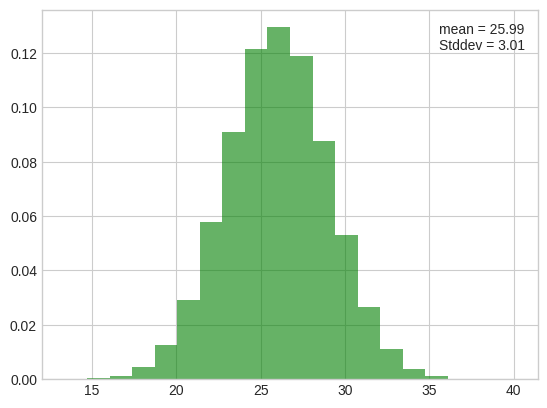

In [ ]:
# prompt: generate 100000 random normally distribuited numpy array with mean of 26 and standard deviation of 3

mu = 26
sigma = 3
lam=2.5
rn = norm.rvs(loc=mu, scale=sigma, size=100000)
#rn = np.random.poisson(lam, size=100000)
# prompt: draw an histogram with rn
popmean =np.mean(rn)
popstd = np.std(rn)
popvar = np.power(popstd,2)

plt.hist(rn, bins=20, density=True, alpha=0.6, color='g');
plt.legend(title='mean = {:.2f}\nStddev = {:.2f}'.format(popmean, popstd));

### generando las muestras, calculando sus estadísticas

In [ ]:
# select a q number of sample of size n from rn and store it in a numpy array
q = 20
n = 15
sample = np.random.choice(rn, size = (q,n), replace = True)

#calculating mean of each sample
samplemean = np.mean(sample, axis = 1)
samplevar = np.power(np.std(sample, axis = 1),2)


## Distribution of the sample variance

6.80403095244264


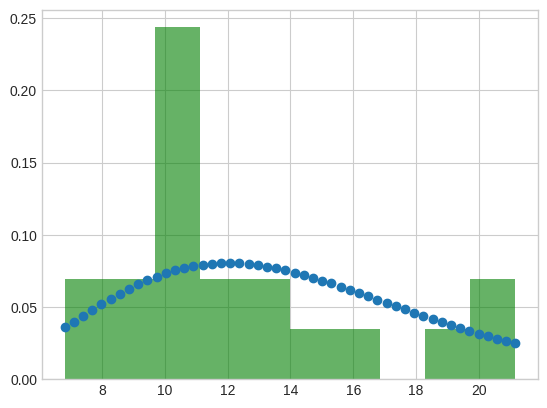

In [ ]:
Y = samplevar *(n-1)/popvar
print(np.min(Y))
x = np.linspace(np.min(Y), np.max(Y), 50)
### Plotting Y
plt.hist(Y, bins=10, density=True, alpha=0.6, color='g')

### plotting equivalent CHI squared
chi2_pdf = chi2.pdf(x, n-1)
plt.scatter(x, chi2_pdf);


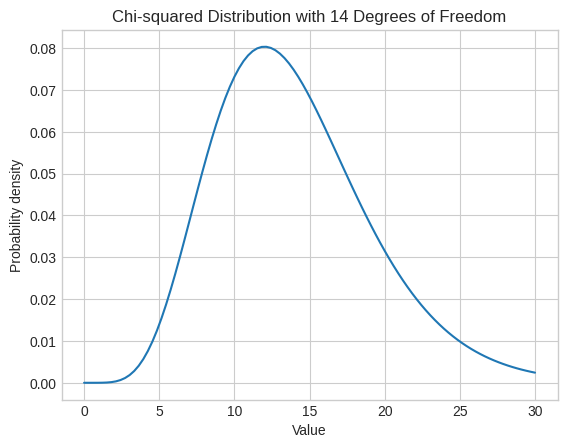

In [ ]:
# prompt: plot a chi squared distribution with 14 degrees of freedom

import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 30, 100)
chi2_pdf = chi2.pdf(x, 14)
plt.plot(x, chi2_pdf)
plt.xlabel('Value')
plt.ylabel('Probability density')
plt.title('Chi-squared Distribution with 14 Degrees of Freedom')
plt.show()


## Distribution of the sample mean

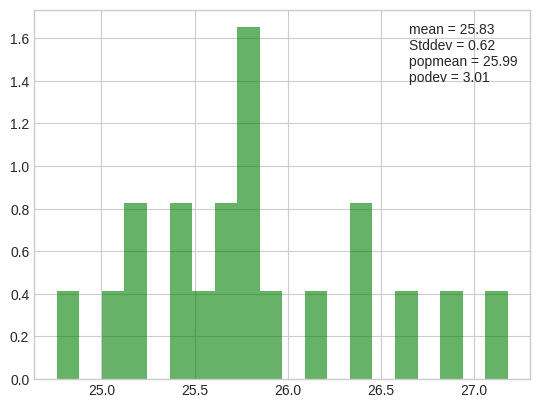

In [ ]:
### Plotting sample Mean
plt.hist(samplemean, bins=20, density=True, alpha=0.6, color='g')

# Adding the legend
plt.legend(title='mean = {:.2f}\nStddev = {:.2f}\npopmean = {:.2f}\npodev = {:.2f} '.format(np.mean(samplemean),samplemean.std(),popmean, popstd));


In [ ]:
###

### prueba del cálculo del Standard Error of the mean

In [ ]:
print(samplemean.std(), popstd/pow(15,0.5))

0.6185851267666062 0.7768513651488645


In [ ]:
# prompt: calculate cumulative Student´s T probability for T = 1.435414

from scipy.stats import t
for i in range(5):
  T = -3.516034 -(i/1.023881)
  # Calculate the cumulative Student's T probability for T = 1.435414
  prob =t.cdf(T, df=22)
  print(i, T, prob)

# Print the result
#print("The cumulative Student's T probability for T = 1.435414 is:", prob)


0 -3.516034 0.0009738444787160603
1 -4.492710000433644 9.053328371142761e-05
2 -5.4693860008672885 8.520972952580839e-06
3 -6.446062001300932 8.71251157955495e-07
4 -7.422738001734576 9.999649466002423e-08


# testing array plotting

In [ ]:
print(math.gamma(2))



1.0


In [ ]:
sp.integrate(seccentr,x)

NameError: name 'seccentr' is not defined

In [ ]:
expe =sp.Symbol("x")
expe

In [ ]:
sp.integrate(expe,99,100)

In [ ]:
sp.integrate(seccentr,(y,49,50),(x,99,100)) - (sp.integrate(expe,(y,49,50),(x,99,100)))**2

In [ ]:
148207/144

In [ ]:
sp.integrate(seccentr,x,y)

In [ ]:
x = [1, 2, 3, 4, 5]
y = [1, 8, 27, 64, 125]
plt.plot(x, y, label='$y = x^3$')

# Adding the legend
plt.legend(title='Cube Root', title_fontsize=14, fontsize=12)
plt.title('Cube Root Plot', fontsize=16)
plt.xlabel('X-axis', fontsize=14)
plt.ylabel('Y-axis', fontsize=14)

plt.show()

In [ ]:
print('parámetros n = {0}, p = {1}'.format(n,p))
print('media de la muestra binomial ->', xbin.mean())
print('desv std de la muestra binomial ->', xbin.std())
print('media binomial teórica \u03bc = n*p ->', n*p)
print('desv std binomial teórica \u03c3 = \u221A [(n*p)(1-p)] ->', np.sqrt(n*p*(1-p)))

In [ ]:
fig = plt.figure()
fig.suptitle(r"$Z = x_1^3 + 4x_2^2 + 16x_3$", fontsize = 10)
fig.subplots_adjust (hspace = 0.3, wspace = 0.3)
a = np.linspace(1,4,500)
b = np.linspace(1,4,12)
solmatrix = np.zeros(shape=(500, 12, 4)) # Array x1, x2, z
plotcount = 0
for  x2 in b:
  plotpoint = 0
  for x1 in a:
    x3 = 4/(x1 * x2)
    if  x3 >=1:
      Z = pow(x1,3) + 4*pow(x2,2) + 16*x3
      solmatrix[plotpoint, plotcount, 0] = x1
      solmatrix[plotpoint, plotcount, 1] = x2
      solmatrix[plotpoint, plotcount, 2] = x3
      solmatrix[plotpoint, plotcount, 3] = Z
    plotpoint += 1

  zvalmax = np.nanmax(solmatrix[solmatrix[:,plotcount, 3] > 0,plotcount,3])
  zvalmin = np.nanmin(solmatrix[solmatrix[:,plotcount, 3] > 0,plotcount,3])
  x1indmax  = np.nanargmax(solmatrix[:,plotcount,3])
  x1valmax = solmatrix[x1indmax,plotcount,0]
  x3valmax = solmatrix[x1indmax,plotcount,2]
  maxx1val = np.nanmax(solmatrix[solmatrix[:,plotcount, 3] > 0,plotcount,0])
  ax = fig.add_subplot(3,4,plotcount + 1)
  ax.set_title("$x_2 = {0}$".format(round(x2,2)),fontweight="bold", size=9, pad=3) # subplot Title
  ax.tick_params(axis='both', which='major', labelsize=7, pad=3)
  ax.scatter(solmatrix[solmatrix[:,plotcount, 3] > 0,plotcount,0],
             solmatrix[solmatrix[:,plotcount, 3] > 0,plotcount,3],
             s= 1, label = "Z")
  ax.legend(loc="upper center", fontsize = "xx-small", markerscale = 2)
  if plotcount == 11:
    ax.annotate(text="max val {0}\nfor x1 = {1}\n     x3 = {2}".format(np.round(zvalmax,3), np.round(x1valmax,4),np.round(x3valmax,4)),
                xy=(x1valmax, zvalmax), xytext = (1 + 0.35 *(maxx1val - 1),78),
                fontsize = 6, arrowprops=dict(arrowstyle="->", shrinkA=0.1))
  else:
    ax.annotate(text="max val {0}\nfor x1 = {1}\n     x3 = {2}".format(np.round(zvalmax,3), np.round(x1valmax,4),np.round(x3valmax,4)),
              xy=(x1valmax, zvalmax), xytext = (1 + 0.35 *(maxx1val - 1), zvalmin + 0.65 * (zvalmax - zvalmin)),
              fontsize = 6, arrowprops=dict(arrowstyle="->", shrinkB=1))


  plotcount += 1

fig.savefig("foo.pdf", bbox_inches='tight')
plt.show()


In [ ]:
def zfunction(x1,x2):
  return pow(x1,3) + 4*pow(x2,2) + 64/(x1*x2)

fig = plt.figure()
fig.suptitle("$Z = x_1^3 + 4x_2^2 + 16x_3$  \n$x_1x_2x_3 = 4$", fontsize = 10)
ax = plt.axes(projection='3d')
ax.view_init(35, 35)
plt.xlim(1,4)
plt.ylim(1,4)


a = np.linspace(1,4,100)
b = np.linspace(1,4,100)
X, Y = np.meshgrid(a, b)
Z = zfunction(X,Y)

factible = (4/np.multiply(X, Y))>=1

x1 = np.multiply(X,factible)
x2 = np.multiply(Y,factible)
z = np.multiply(Z,factible)

maxz = np.max(z)
maxindx= (np.argwhere(z == maxz)[0,0], np.argwhere(z == maxz)[0,1])

minz = np.min(z[z>0])
minindx= (np.argwhere(z == minz)[0,0], np.argwhere(z == minz)[0,1])

ax.plot_wireframe(x1, x2, z)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Z')
ax.text(x1[maxindx], x2[maxindx], z[maxindx],
        "max val {}\nfor x1 = {}\n     x2 = {}\n     x3 = {}".format(np.round(z[maxindx],3),
        np.round(x1[maxindx],3),np.round(x2[maxindx],4),np.round(4/(x1[maxindx]*x2[maxindx]),4)))

ax.text(x1[minindx], x2[minindx], z[minindx],
        "min val {}\nfor x1 = {}\n     x2 = {}\n     x3 = {}".format(np.round(z[minindx],3),
        np.round(x1[minindx],3),np.round(x2[minindx],4),np.round(4/(x1[minindx]*x2[minindx]),4)),
        verticalalignment='top')

fig.savefig("foo.pdf", bbox_inches='tight') ;


*italicized text*# Prueba


In [ ]:
def zfunction(x1,x2):y
  return pow(x1,3) + 4*pow(x2,2) + 64/(x1*x2)

print(zfunction(1.90709, 1.61277), 4/(1.90709*1.61277), 8 / pow(192,3/11))


In [ ]:
for x in range(6):
  f =3+x+(6+(16/27))*pow(1/3,x)
  print(x,f)


In [ ]:

tot=multnom.pmf([27,18, 15], n= 60, p=[1/3, 1/3, 1/3])
print(tot)

formula = math.factorial(60)*pow(1/3,27)*pow(1/3,18)*pow(1/3,15)/(math.factorial(27)*math.factorial(18)*math.factorial(15))
print(formula)

In [ ]:
import fractions

def zfunction(x1,x2):
  return (3*pow(x2,2) - 5*pow(x1,2)*pow(x2,2) + 3*pow(x1,2))/16

a = np.array([-1,0,1])
b = np.array([-1,0,1])
X, Y = np.meshgrid(a, b)
np.set_printoptions(formatter={'all':lambda x: str(fractions.Fraction(x).limit_denominator())})
print(zfunction(X,Y))

In [ ]:
def F(t1,t2):
  return (1-pow(np.e,-t1/5))*(1-pow(np.e,-10*t2))

print(F(8,12/60))

# Dynamic programming test for exercise 11-3.7 Hillier y Liebermman


In [ ]:
def Probability(sol, stage, probacum,costacum,mtr):
  for a in comp:
    for b in units:
      print (a, stage)
      probacum *= prob[a][b]
      costacum += cost[a][b]
      if stage < 3:
        stage += 1
        sol += a + str(b)
        return Probability(sol, stage, probacum,costacum, mtr)
      sol += a + str(b)
      mtr[sol] = [probacum, costacum]
    return

sol =""
mtr = {}
stage = 0
state = 0
probacum = 1
costacum = 0
prob = {'comp1':{1:.5,2:.6,3:.8},'comp2':{1:.6,2:.7,3:.8},'comp3':{1:.7,2:.8,3:.9},'comp4':{1:.5,2:.7,3:.9}}
cost = {'comp1':{1:1,2:1,3:3},'comp2':{1:2,2:4,3:5},'comp3':{1:1,2:3,3:4},'comp4':{1:2,2:3,3:4}}
comp = ['comp1', 'comp2', 'comp3', 'comp4']
units = [1,2,3]
budget = 10

Probability(sol, stage, probacum,costacum, mtr)







In [ ]:
def zfunction(x,y):
  return x*y

fig = plt.figure()
fig.suptitle("Z = x * y", fontsize = 10)
ax = plt.axes(projection='3d')
#ax.view_init(35, 35)
#plt.xlim(1,4)
#plt.ylim(1,4)


a = np.linspace(99,100,100)
b = np.linspace(49,50,100)
X, Y = np.meshgrid(a, b)
Z = zfunction(X,Y)

print(np.max(Z))
print(np.min(Z))

ax.plot_wireframe(X, Y, Z)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Z')


In [ ]:
def powerfunc(lb, ub, miu, sigma, n):
  powergraf = []

  for i in miu:
    zl = (lb - i)*math.sqrt(n)/sigma
    zu = (ub - i)*math.sqrt(n)/sigma
    POWER = norm.cdf(zl)+(1-norm.cdf(zu))
    powergraf.append(POWER)
  print(powergraf)
  return powergraf

fig, ax = plt.subplots()

data = [19.5, 19.6, 19.7, 19.8, 19.9, 20.0,
        20.1, 20.2, 20.3, 20.4, 20.5]
#data = [0.05]

n = 36
sigma = 0.5
lb = 19.8333
ub = 20.1667
etiqueta = "lower bound = {},\nupper bound ={}".format(lb, ub)+"\n"+ r"$\alpha = 0.0455$"
ax.plot(data, powerfunc(lb, ub, data, sigma, n), label = etiqueta)

lb= 19.75
ub = 20.25
etiqueta = "lower bound = {},\nupper bound ={}".format(lb, ub)+"\n"+ r"$\alpha = 0.0124$"
ax.plot(data, powerfunc(lb, ub, data, sigma, n), label = etiqueta)


plt.xlabel('fill mean (oz)')
plt.ylabel('probability')
ax.legend()
fig.suptitle(r"Power Function $H_0 = 20, H_1 \neq 20, \sigma = {}, n = {}$".format(sigma, n), fontsize = 10)
#fig.savefig("foo.pdf", bbox_inches='tight')
plt.show();



In [ ]:
def prob(p):
  prob = 0
  for i in range(2,37):
    prob += (math.factorial(36)/(math.factorial(36-i)*math.factorial(i)))*pow(p,i)*pow(1-p,36-i)
  return prob

prob(.05)


In [ ]:
n, p = sp.symbols("n,p")
mse = (n*p*(1-p)+4*p**2-1)/(n+2)**2 - p*(1-p)/n
sp.solve(mse, p)

In [ ]:
a = (n - sp.sqrt(3*n**2 + 3*n + 1) + 1)/(2*(2*n + 1))
a

In [ ]:
def calc (n):
  b = (n - math.sqrt(3*n**2 + 3*n + 1) + 1)/(2*(2*n + 1))
  c = (n + math.sqrt(3*n**2 + 3*n + 1) + 1)/(2*(2*n + 1))
  mst1 = (c+0.1)*(1-(c+0.1))/n
  mst2 = (n*(c+0.1)*(1-(c+0.1))+4*(c+0.1)**2-1)/(n+2)**2
  return b,c, mst1, mst2

x, y, mst1, mst2 = calc(3)
print(x,y)
print("mse (T1) ->>>",mst1)
print("mse (T2) ->>>",mst2)

In [ ]:
fig = plt.figure()
fig.suptitle(r"MSE Comparison T1 and T2", fontsize = 10)
#fig.subplots_adjust (hspace = 0.3, wspace = 0.3)
p = np.linspace(0.001,0.999,1000)

n = 10
ax = fig.add_subplot(1,2,1)
ax.set_title("n = 10",fontweight="bold", size=9, pad=3) # subplot Title
#ax.tick_params(axis='both', which='major', labelsize=7, pad=3)
ax.scatter(p, p*(1-p)/n,s= 1, label = "MSE(T1)")
ax.scatter(p, (n*p*(1-p)+4*p**2-1)/(n+2)**2,s= 1, label = "MSE(T2)")
ax.legend()
#  if plotcount == 11:
#    ax.annotate(text="max val {0}\nfor x1 = {1}\n     x3 = {2}".format(np.round(zvalmax,3), np.round(x1valmax,4),np.round(x3valmax,4)),
#                xy=(x1valmax, zvalmax), xytext = (1 + 0.35 *(maxx1val - 1),78),
#                fontsize = 6, arrowprops=dict(arrowstyle="->", shrinkA=0.1))
#  else:
#    ax.annotate(text="max val {0}\nfor x1 = {1}\n     x3 = {2}".format(np.round(zvalmax,3), np.round(x1valmax,4),np.round(x3valmax,4)),
#              xy=(x1valmax, zvalmax), xytext = (1 + 0.35 *(maxx1val - 1), zvalmin + 0.65 * (zvalmax - zvalmin)),
#              fontsize = 6, arrowprops=dict(arrowstyle="->", shrinkB=1))
n = 25
ax = fig.add_subplot(1,2,2)
ax.set_title("n = 25",fontweight="bold", size=9, pad=3)
ax.scatter(p, p*(1-p)/n,s= 1, label = "MSE(T1)")
ax.scatter(p, (n*p*(1-p)+4*p**2-1)/(n+2)**2,s= 1, label = "MSE(T2)")
ax.legend()

#  plotcount += 1

fig.savefig("foo.pdf", bbox_inches='tight')
plt.show()

In [ ]:
a =math.sqrt((99*(4.8**2)+99*(5.4**2))/198)
print(a)
print(math.sqrt(26.1*2)/10)



In [ ]:

data = np.array([38, 32, 41, 35, 42, 32, 45, 37])

print ("media muestral x = {}".format(data.mean()))
print ("varianza x = {}".format(data.std()**2))
print ("desv std x = {}".format(data.std()))
print ("min value x = {}".format(data.min()))
print ("tamaño muestral x = {}".format(data.size))
print ("varianza muestral x = {}".format(data.size*(data.std()**2)/(data.size-1)))
print ("desv std muestral x = {}".format(math.sqrt(data.size*(data.std()**2)/(data.size-1))))


data1 = np.array([30, 32, 34, 37, 35, 26, 38, 32])

print ("media muestral y = {}".format(data1.mean()))
print ("varianza y = {}".format(data1.std()**2))
print ("desv std y = {}".format(data1.std()))
print ("min value y = {}".format(data1.min()))
print ("tamaño muestral y = {}".format(data1.size))
print ("varianza muestral y = {}".format(data1.size*(data1.std()**2)/(data1.size-1)))
print ("desv std muestral y = {}".format(math.sqrt(data1.size*(data1.std()**2)/(data1.size-1))))

print("spooled variance = {}".format(((data.size-1)*(data.std()**2)+(data1.size-1)*(data1.std()**2))/(data1.size+data.size-2)))
print("spooled std dev = {}".format(math.sqrt(((data.size-1)*(data.std()**2)+(data1.size-1)*(data1.std()**2))/(data1.size+data.size-2))))

In [ ]:
# prompt: plot a histogram with the following values 38, 35, 76,58, 42, 59, 67, 63, 33, 69, 53, 51, 28, 25, 36, 32, 61, 57, 49, 78, 48, 42, 72, 52, 47, 66, 58,  44, 44, 56

import matplotlib.pyplot as plt
import numpy as np
values = [38, 35, 76,58, 42, 59, 67, 63, 33, 69, 53, 51, 28, 25, 36, 32, 61, 57, 49, 78, 48, 42, 72, 52, 47, 66, 58,  44, 44, 56]
plt.hist(values, bins=7, density=True, alpha=0.6, color='g');
plt.legend(title='mean = {:.2f}\nStddev = {:.2f}'.format(np.mean(values),np.std(values)));


In [ ]:
print(norm.ppf(0.975))
print((1 -norm.cdf(0.02*(250**.5)/math.sqrt(0.0564)))*2)
print(0.02*(250**.5)/math.sqrt(0.0564))


In [ ]:
a = np.array([27,66, 91, 70, 57, 34, 16, 3])
b = np.array([0, 1, 2, 3, 4, 5, 6, 7])
expected_freq = poisson.pmf(b[:-1],2.6731)
expected_freq = np.concatenate((expected_freq,np.array([1-poisson.pmf(b[:-1],2.6731).sum()])))
expected_freq = np.round(expected_freq*364,0)
print(expected_freq)
print(np.round(((a-expected_freq)**2)/expected_freq,4).sum())

In [ ]:
a = np.sort(np.array([38, 35, 76, 58, 48, 59,
              67, 63, 33, 69, 53, 51,
              28, 25, 36, 32, 61, 57,
              49, 78, 48, 42, 72, 52,
              47, 66, 58, 44, 44, 56]))
fx= norm.cdf(56.8, loc = a.mean(), scale = a.std())
print(fx)
sx = norm.cdf(67.4, loc = a.mean(), scale = a.std())
print(sx)
print(round(sx - fx,4))
print(round((sx - fx)*30,0))


In [ ]:
a =np.array([120, 100, 80])
b = np.array([97, 203])[:,np.newaxis]
efreq =np.round(((a*b)/a.sum()),4)
print(efreq)
freq =np.array([[42,35, 20], [78, 65, 60]])
print(np.round(((freq-efreq)**2)/efreq,4))
print(np.round((((freq-efreq)**2)/efreq).sum(),4))


In [ ]:
a =np.array([120,100, 80])
b = np.array([255, 215, 50])[:,np.newaxis]
print(np.round(((a*b)/a.sum()),4))


In [ ]:
def intercepto(x1, y1, x2, y2):
  m = (y2-y1)/(x2-x1)
  b = y1 - m*x1
  x0 = -b/m
  return x0

def cero(x1, x2):
  if x2.min()<0:
    px=np.where(np.isclose(x2, x2[x2<0].max()))[0][0]
  else:
    return x1, x2
  x1[px] = intercepto(x1[0], x2[0], x1[1], x2[1])
  x2[px] = 0
  x2[x2<0] = None
  return x1, x2

fig, ax = plt.subplots()
n=100
x1 = np.linspace(0, 7, n)

#Constraint 1
x1, x2 = cero(x1, ( 5*x1 - 3)/7)
etiqueta = r"$-X_1 + 2X_2 \leq 4$"
ax.plot(x1,x2, label = etiqueta, ls =":")
ax.fill_between(x1, x2, 0, color='blue', alpha=.1)

#Constraint 2
etiqueta = r"$X_1 \leq 3$"
plt.axvline(x=3, fillstyle = 'left', label = etiqueta, color = 'green', ls ="--")
ax.axvspan(0, 3, alpha=0.1, color = 'green')


#Constraint 3
x2 = np.full(100,3)
etiqueta = r"$X_2 \leq 3$"
ax.plot(x1, x2, label = etiqueta, ls ="-.")
ax.fill_between(x1, x2, 0, color='orange', alpha=.1)

#Constraint 4
x2 = np.full(100,2)
etiqueta = r"$X_2 \geq 2$"
ax.plot(x1, x2, label = etiqueta, ls =(0, (5, 1)), color = 'yellow')
ax.fill_between(x1, x2, 3, color='yellow', alpha=.1)


#Constraint 4
#x1, x2 = cero(x1, 3)
#etiqueta = r"$X_1 - X_2 \leq 1$"
#ax.plot(x1, x2, label = etiqueta)
#ax.fill_between(x1, x2, 0, color='orange', alpha=.1)

#Constraint 3
#x1, x2 = cero(x1, 12 - 4*x1)
#etiqueta = r"$4X_1 + X_2 \leq 12$"
#ax.plot(x1, x2, label = etiqueta)
#ax.fill_between(x1, x2, 0, color='green', alpha=.1)

#Constraint 4

#etiqueta = r"$4X_1 + X_2 \leq 12$"
#plt.axvline(x=3, fillstyle = 'left', gapcolor ='blue')
#ax.axvspan(8, 14, alpha=0.5, color='orange')

#Constraint 5

#x2 = np.full(100,3)
#etiqueta = r"$X_2 \leq 3$"
#ax.plot(x1, x2, label = etiqueta)
#ax.fill_between(x1, x2, 0, color='green', alpha=.1)

#objective Function
x1 = np.linspace(0, 7, 100)
Z = 1
x1, x2 = cero(x1, (Z + 3*x1)/5)
etiqueta = r"$Z = -3X_1 + 5X_2$"
ax.plot(x1, x2, label = etiqueta, color = 'magenta')


plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")
ax.legend()
fig.suptitle("Integer Programming  Z = {}".format(Z), fontsize = 10)
plt.annotate("Z = 14.6", xy =(1.25, 8.5), xytext=(2,10), arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.2"))
plt.show();

In [ ]:
def intercepto(x1, y1, x2, y2):
  m = (y2-y1)/(x2-x1)
  b = m*x1- y1
  x0 = b/m
  return x0

def feasover(x, y):
  yo = y
  xo = np.copy(x)
  for i in range(1, 11 - int(y.min())):
    yo = np.append(yo,y+i )
    yo[yo>10] = 10
    xo = np.append(xo, x)

  return np.reshape(xo, (11 - int(y.min()),len(x))), np.reshape(yo, (11 - int(y.min()),len(y)))

def feasunder(x, y):
  yo = np.zeros(len(y))
  xo = np.copy(x)
  tope = int(y.max())+1
  for i in range(1,tope):
    yo = np.append(yo, (np.zeros(len(y)) + i) * ((np.zeros(len(y)) + i)<=y))
    xo = np.append(xo, x)
  return np.reshape(xo, (tope, len(x))), np.reshape(yo, (tope, len(y)))

def cero(k1, k2):

  if k2.min()<0:
    px=np.where(np.isclose(k2, k2[k2<0].max()))[0][0]
    k1[px] = intercepto(k1[0], k2[0], k1[1], k2[1])
    k2[px] = 0.0
    k2[k2<0] = 0
    return k1, k2
  else:
    return k1, k2

fig, ax = plt.subplots()
n=11
x1 = np.linspace(0, 10, n)

#Constraint 1
c1, c2 = cero(x1, (5*x1 -3)/7)
g1, g2 = feasunder(c1, c2)
etiqueta = r"$5X_1 - 7X_2 \geq 3$"
ax.scatter(g1,g2, label = etiqueta, s= 20)
#ax.fill_between(x1, x2, 0, color='blue', alpha=.1)

#x1 = np.linspace(0, 10, n)
#Constraint 2
#c1, c2 = cero(x1, x1 - 1)
#g1, g2 = feasover(c1, c2)
#etiqueta = r"$X_1 - X_2 \leq 1$"
#ax.scatter(g1, g2, label = etiqueta, marker='o', facecolors='none', edgecolors='orange', s= 40)
#ax.fill_between(x1, x2, 0, color='orange', alpha=.1)

#x1 = np.linspace(0, 10, n)
#Constraint 3
#c1, c2 = cero(x1, 12 - 4*x1)
#g1, g2 = feasunder(c1, c2)
#etiqueta = r"$4X_1 + X_2 \leq 12$"
#ax.scatter(g1, g2, label = etiqueta, marker='o', facecolors='none', edgecolors='g', s= 100)
#ax.fill_between(x1, x2, 0, color='green', alpha=.1)

#constraint 4
g1 = np.array([0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3])
g2 = np.array([1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7,8,8,8,8,9,9,9,9,10,10,10,10])
etiqueta = r"$X_j \leq 3$"
ax.scatter(g1, g2, label = etiqueta, marker='o', facecolors='none', edgecolors='orange', s= 40)

x1 = np.linspace(0, 10, n)
#objective Function
Z = -1
c1, c2 = cero(x1, (Z + 3*x1)/5)
etiqueta = r"$Z = -3X_1 + 5X_2$"
ax.plot(c1, c2, label = etiqueta)


plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")
ax.legend()
fig.suptitle("Integer Programming ", fontsize = 10)
#plt.annotate("Z = -1", xy =(.8, 9), xytext=(6,3), arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.2"))
plt.legend(loc="upper right", ncols = 4, fontsize = "x-small")
plt.show();

In [ ]:
def feasover(x, y):
  y = np.array([5, 2, 7, 9])
  x = np.array([1, 2, 3, 4])
  yo = y
  xo = np.copy(x)
  print(10 - y.min())
  for i in range(1, 11 - y.min()):
    yo = np.append(yo,y+i )
    yo[yo>10] = 10
    xo = np.append(xo, x)
  print(xo)
  print(yo)
  return np.reshape(xo, (11 - y.min(),len(x))), np.reshape(yo, (11 - y.min(),len(y)))


x, y = feasover(np.array([1, 2, 3, 4]), np.array([5, 2, 7, 9]))
print(x)
print(y)
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show;

In [ ]:
def suma(c,x, pos):
  return (c[pos]*x[pos]).sum()

def sumasqrd(c,x,pos):
  return ((c[pos]*x[pos]).sum()**2)

pos = np.array([True, True, True, False])
c = np.array([80, 60, 40, 20])
d = np.array([7, 5, 3, 2])
x= np.array([1, 1, 1, 0])
print("sumatoria CiXi = ",suma(c,x,pos), "  sumatoria de DiXi =", suma(d,x,pos), "  sumatoria al cuadrado de DiXi =",sumasqrd(d,x,pos))
i = c[np.invert(pos)]
print("Cj = ",i)
print("Dj = ",d[np.invert(pos)])
print("ecuacion 3 =", (d[np.invert(pos)]+suma(d,x,pos))**2)
j = (d[np.invert(pos)]+suma(d,x,pos))**2-sumasqrd(d,x,pos)
print("ecuacion 4 =",j)
arrgl = i - j
print("ecuacion 5 =",arrgl)
print("len arreglo =",len(arrgl) )
print(np.reshape(np.append(arrgl,np.zeros(len(arrgl))),(2,len(arrgl))))
ecu6 = np.sum(np.max(np.reshape(np.append(arrgl,np.zeros(len(arrgl))),(2,len(arrgl))),axis=0))
print("ecuacion 6 =",ecu6)
print("Bound = ",suma(c,x,pos) + sumasqrd(d,x,pos) + ecu6)
print("Z = ",suma(c,x,pos) - sumasqrd(d,x,pos) )

In [ ]:
#limits for mean, know pop mean and variance
sigma = 3
miu = 400.2
desv = 15.3
n = 5

ll = miu - sigma*desv/math.sqrt(n)
ul = miu + sigma*desv/math.sqrt(n)

print(ll,ul)

In [ ]:
#limits for mean, unknown pop mean and variance
def c(n):
  c4 = math.sqrt(2)*math.gamma(n/2)/(math.sqrt(n-1)*math.gamma((n-1)/2))
  c5 =math.sqrt(1-c4**2)
  return c4, c5

sigma = 3
miu = 400.2
desv = 15.3
n = 5

c4, c5 = c(n)

meanLL = miu - sigma*desv/(c4*math.sqrt(n))
meanUL = miu + sigma*desv/(c4*math.sqrt(n))

sdLL = desv - (3*desv*c5/c4)
sdUL = desv + (3*desv*c5/c4)

print("Mean Lower Limit = {:.4f}".format(meanLL),"Mean Upper Limit = {:.4f}".format(meanUL))
print("SD Lower Limit = {:.4f}".format(sdLL),"SD Upper Limit = {:.4f}".format(sdUL))
print("c4 = {:.4f}".format(c4),"c5 = {:.4f}".format(c5))

In [ ]:
#normal stat control

fig, ax = plt.subplots()

sigma = 3
miu = 500
desv = 20
n = 6
obs = 10

ll = miu - sigma*desv/math.sqrt(n)
ul = miu + sigma*desv/math.sqrt(n)

sample = np.array([498.6, 508.3, 484.6, 505.7, 491.7, 495.4, 482.6, 515.2, 510.8, 503.7])

obs = sample.size

xo =np.arange(0, obs + 1)
x = np.arange(1,obs + 1)


#Upper Limit Plot
ax.plot(xo, np.full(obs + 1,ul), color = "red")

#Lower limit plot
ax.plot(xo, np.full(obs + 1,ll), color = "red")

#Sample Plot
ax.plot(x, sample, marker='o')

fig.suptitle("Breaking Strength Control Chart", fontsize = 10)
ax.set_ylabel("Sample mean breaking Strength")
ax.set_xlabel("week")
ax.annotate("Upper control limit = {:.2f}".format(ul), xy=(1,ul - (ul-ll)*.04))
ax.annotate("Lower control limit = {:.2f}".format(ll), xy=(1,ll + (ul-ll)*.04))
plt.show();

plt.show;




In [ ]:
#binomial stat control

fig, ax = plt.subplots()

sample = np.array([2, 1, 4, 3, 2, 2, 5, 3, 4, 2, 1, 5, 2,
                   3, 2, 1, 0, 6, 4, 5, 2, 1, 3, 2])

n = 100 #Sampling size

obs = sample.size #number of n size samples taken

p = sample.sum()/(obs * n)
print("p Avg = {:.6f}".format(p))


ll = p - 3*math.sqrt(p*(1-p)/n)
ul = p + 3*math.sqrt(p*(1-p)/n)

miunormal = n*p
stdnormal = math.sqrt(n*p*(1-p))
z1 =((100*ll) - miunormal)/stdnormal
z2 =((100*ul) - miunormal)/stdnormal

print("normal aprox = {:.6f}".format(1-norm.cdf(z2)))
print("binomial aprox = {:.6f}".format(1- binom.cdf(7,n,p)))

print("Lower control limit = {:.6f}".format(ll))
print("Upper control limit = {:.6f}".format(ul))

if ll < 0:
  print ("wrong ll {:.6f}".format(ll))
  ll = 0
if ul > 1:
  print ("wrong ul {:.6f}".format(ul))
  ul = 1


xo =np.arange(0, obs + 1)
x = np.arange(1, obs + 1)


#Upper Limit Plot
ax.plot(xo, np.full(obs +1 ,ul), color = "red")

#Lower limit plot
ax.plot(xo, np.full(obs + 1,ll), color = "red")

#Sample Plot
ax.plot(x, sample/n, marker='o')

fig.suptitle("manufacturing defect p-chart", fontsize = 10)
ax.set_ylabel("% defective")
ax.set_xlabel("day")
ax.annotate("Upper control limit = {:.6f}".format(ul), xy=(1,ul - (ul-ll)*.04))
ax.annotate("Lower control limit = {:.6f}".format(ll), xy=(1,ll + (ul-ll)*.04))
plt.show();


In [ ]:
fig, ax = plt.subplots()

n= 25
k = 1

x = np.linspace(0, 0.25, 100)
y = binom.cdf(k, n, x)

ax.plot(x, y)

fig.suptitle("OC Chart n=25, k =1", fontsize = 10)
ax.set_ylabel("Prob of acceptance")
ax.set_xlabel("p")
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(3))
plt.show();


# SST

In [ ]:
treatment = 4
alfa = 0.01
#a = np.array([16, 18, 19, 15, 19, 20,15, 19, 18,
#              14, 20, 20, np.NaN, 19, 19, np.NaN, 19, np. NaN])

#a = np.array([14.4, 14.5, 13.8, 13.0, 13.1,
#              14.8, 14.1, 14.1, 13.4, 12.8,
#              15.2, 14.6, 13.7, 13.2, 12.9,
#              14.3, 14.2, 13.6, np.NaN, 13.2,
#              14.6, np.NaN, 14, np.NaN, 13.3,
#              np.NaN, np.NaN, np.NaN, np.NaN, 12.7])

#a = np.array([1240, 1420, 1480, 1610, 1700,
#              1350, 1510, 1470, 1590, 1790,
#              1390, 1410, 1520, 1580, 1740,
#              1280, 1530, 1540, 1630, 1810,
#              1320, 1470, 1510, 1560, 1730])


a = np.array([140, 93, 78, 85,
              125, 135, 112, 72,
              95, 68, 57, 97,
              110, 53, 97, 105,
              59, 115, 52, 62])


data = a.reshape(int(a.size/treatment),treatment)
N = np.count_nonzero(~np.isnan(data))
nj = np.count_nonzero(~np.isnan(data), axis=0)
Yj = np.nanmean(data, axis = 0)
Ymean= np.nanmean(data)
total = np.nansum(data)
Tj = np.nansum(data, axis = 0)


print(data)
print(np.round(np.nanmean(data),4))
print(np.round(data- np.nanmean(data),4))
print((data- np.nanmean(data))**2)
print(np.round((data- np.nanmean(data))**2,4))
SST = np.nansum((data- np.nanmean(data))**2)
print("SST = ",np.round(SST,6))

#SSTR

In [ ]:

print (Yj)

print(np.round(Ymean,4))
sd = np.round(np.subtract(Yj, Ymean),4)
print(sd)
sd2 = np.round(sd**2,4)
print(sd2)

print(nj)
print(np.multiply(nj,sd2))
SSTR = np.round(np.nansum(np.multiply(nj,sd2)),6)
print("SSTR = ",SSTR)

# SSE

In [ ]:
print(data)
print("")
print(Yj)
print("")
print(np.round(np.subtract(data,Yj),4))
print("")
print(np.round((np.subtract(data,Yj)**2),4))
print("")
SSE  = np.round(np.nansum(np.subtract(data,Yj)**2),6)
print("SSE = ", SSE)

In [ ]:
dfsst = np.count_nonzero(~np.isnan(data))-1
dfsstr = treatment - 1
dfsse = dfsst - dfsstr
print("degrees of freedom treatment = ", dfsstr)
print("degrees of freedom error = ", dfsse)
MSTR = SSTR/dfsstr
MSSE = SSE/dfsse
print("MSTR = ",MSTR)
print("MSSE = ",MSSE)
F = MSTR/MSSE
print("F = {:.4f}".format(F))
efe = f.ppf(1-alfa ,dfsstr, dfsse)
print("f {},{},{} = {:.4f}".format(1-alfa, dfsstr, dfsse, efe))

#SST, SSTR, SSE hand computation

In [ ]:

print("T =",total,"<--->  T^2 =",total**2, "<--->  N =",N)

SST = np.nansum(data**2)-((total**2)/N)
SSTR = (np.nansum((Tj**2)/nj))-((total**2)/N)
SSE = SST - SSTR
print("Tj ={} <---> nj = {}".format(Tj, nj))
print("SST = ", np.round(SST,4), "<--->  SSTR = ", np.round(SSTR,6), "<--->  SSE = ", np.round(SSE,6))

In [ ]:
MSTR = SSTR/dfsstr
MSSE = SSE/dfsse
print("MSTR = {:.6f} <--->  MSSE = {:.6f}".format(MSTR, MSSE))
F = MSTR/MSSE
print("F = {:.6f}".format(F))

In [ ]:
efe = f.ppf(1-alfa ,dfsstr, dfsse)
print("f {},{},{} = {:.6f}".format(1-alfa, dfsstr, dfsse, efe))

#residual analysis

In [ ]:
eij = np.subtract(data, Yj)
print(np.round(eij,2))
print("")
print(np.round(eij/math.sqrt(MSSE),2))


#Scheffe test

In [ ]:
cmatrix = np.array([0, -1, 1, 0])

#determinación L
L = np.multiply(Yj,cmatrix).sum()
print("Determinación de L")
print("Yj = {} <---> cj = {}".format(Yj, cmatrix))
print("L = {:.6f}".format(L))
print("")

#determinación factor A
fscheffe = round(f.ppf(1-alfa, dfsstr, N - treatment),6)
A = math.sqrt((dfsstr)*fscheffe)
print("Determinación de factor de Scheffe (A)")
print("K-1 = {} <--> f{},{},{} = {}".format(dfsstr, 1-alfa, dfsstr, N - treatment, fscheffe))
print("A = {:.6f}".format(A))
print("")

#determinación Desv Estandar del intervalo
print("Determinación de varianza de L")
sscheffe = math.sqrt(MSSE*np.divide(cmatrix**2,nj).sum())
print("MSE = {:.6f} <---> cj = {} <---> nj = {}".format(MSSE, cmatrix, nj ))
print("S(L) = {:.6f}".format(sscheffe))
print("")

#determinación del Intervalo
print("Intervalo Scheffe")
print("( {:.4f}, {:.4f} )".format(L - A*sscheffe, L + A*sscheffe))

#SINGLE FACTOR EXPERIMENT RANDOMIZE IN A BLOCK DESIGN

In [ ]:
# DATA
#a = np.array([16, 18, 19, 15, 19, 20,15, 19, 18,
#              14, 20, 20, np.NaN, 19, 19, np.NaN, 19, np. NaN])

#a = np.array([14.4, 14.5, 13.8, 13.0, 13.1,
#              14.8, 14.1, 14.1, 13.4, 12.8,
#              15.2, 14.6, 13.7, 13.2, 12.9,
#              14.3, 14.2, 13.6, np.NaN, 13.2,
#              14.6, np.NaN, 14, np.NaN, 13.3,
#              np.NaN, np.NaN, np.NaN, np.NaN, 12.7])

#a = np.array([1240, 1420, 1480, 1610, 1700,
#              1350, 1510, 1470, 1590, 1790,
#              1390, 1410, 1520, 1580, 1740,
#              1280, 1530, 1540, 1630, 1810,
#              1320, 1470, 1510, 1560, 1730])

#a = np.array([140, 93, 78, 85,
#              125, 135, 112, 72,
#              95, 68, 57, 97,
#              110, 53, 97, 105,
#              59, 115, 52, 62])

#a = np.array([33.6, 32.8, 31.9, 27.2, 30.6,
#              36.9, 36.1, 32.1, 34.4, 35.3,
#              34.2, 35.3, 33.7, 31.3, 34.6,
#              34.8, 37.1, 34.8, 32.9, 32.8])

#a = np.array([18.2, 18.9, 19.1, 20.4,
#              27.4, 27.9, 28.1, 29.9,
#              35.2, 34.9, 35.8, 38.2,
#              14.8, 15.2, 14.9, 17.3,
#              25.4, 24.8, 25.6, 26.9])

a = np.array([835, 874, 750, 854,
              787, 827, 755, 829,
              724, 738, 698, 726,
              336, 378, 210, 279,
              252, 315, 168, 336,
              560, 672, 558, 642,
              336, 341, 260, 336])

# COMMON STATISTICS AND INITIAL PARAMETERS
treatment = 4
alfa = 0.05
blocks = int(a.size/treatment)
data = a.reshape(blocks ,treatment)


N = np.count_nonzero(~np.isnan(data)) # total count of data values
nj = np.count_nonzero(~np.isnan(data), axis=0) # count of data en each treatment


Yj = np.nanmean(data, axis = 0) #mean of each treatment
Yi = np.nanmean(data, axis = 1) #mean of each block
Ymean= np.nanmean(data)

Tj = np.nansum(data, axis = 0)
Ti = np.nansum(data, axis = 1)
total = np.nansum(data)

dfsstr = treatment - 1
dfssb = blocks- 1
dfsse = dfsstr * dfssb

#SST
SST = np.nansum(data**2)-((total**2)/(blocks * treatment))

#SSB
SSB = (np.sum(Ti**2)/treatment)- ((total**2)/(blocks * treatment))

#SSTR
SSTR = (np.sum(Tj**2)/blocks) - ((total**2)/(blocks * treatment))

#SSE
SSE  = SST - SSB - SSTR

latex = "\overline{Y} = " + str(Ymean)
display(Latex(latex))
print("Tj ={} <---> Ti = {}".format(Tj, Ti))
print("T = {:.6f}".format(total))
print("SST = {:.6f} <--->  SSB = {:.6f}".format(SST, SSB))
print("SSTR = {:.6f} <--->  SSE = {:.6f}".format(SSTR, SSE))

#Medium Square Calc
MSTR = SSTR/dfsstr
MSSE = SSE/dfsse

print("MSTR = {:.6f} <--->  MSSE = {:.6f}".format(MSTR, MSSE))
F = MSTR/MSSE
print("F = {:.6f}".format(F))
fscheffe = f.ppf(1-alfa, dfsstr, dfsse)

#ANOVA Table

html_table = """<table style="width:50%; border: none;
                  border-collapse: collapse;">
  <tr style ="border-bottom-style: solid; border-width: 1px;">
    <th style="width:20%"; text-align: left></th>
    <th style="width:20%"></th>
    <th style="width:20%">ANOVA table</th>
    <th style="width:20%"></th>
    <th style="width:20%"></th>
  </tr>
  <tr style ="border-bottom-style: solid; border-width: 1px; height: 40px;">
    <th style="text-align: left;">Source of Variation</th>
    <th>df</th>
    <th>SS</th>
    <th>MS</th>
    <th>F value</th>
  </tr>
  <tr style="height: 40px;">
    <th style="text-align: left;">Blocks</th>
    <td style="text-align: center">{}</td>
    <td style="text-align: center">{:.4f}</td>
    <td style="text-align: center"></td>
    <td rowspan = "3"
    	style="text-align: center; border-bottom-style: solid;
    			border-width: 1px;"> {:.4f}</td>
  </tr>
  <tr style="height: 40px;">
    <th style="text-align: left;">Treatment</th>
    <td style="text-align: center">{}</td>
    <td style="text-align: center">{:.4f}</td>
    <td style="text-align: center">{:.4f}</td>
  </tr>
  <tr style="height: 40px;">
    <th style="text-align: left;">Error</th>
    <td style="text-align: center; border-bottom-style: solid;
    			border-width: 1px;">{}</td>
    <td style="text-align: center; border-bottom-style: solid;
    			border-width: 1px;">{:.4f}</td>
    <td style="text-align: center; border-bottom-style: solid;
    			border-width: 1px;">{:.4f}</td>
  </tr>
  <tr style ="border-bottom-style: solid; border-width: 1px; height: 40px;">
    <th style="text-align: left;">Total</th>
    <td style="text-align: center">{}</td>
    <td style="text-align: center">{:.4f}</td>
    <td colspan ="2" style="text-align: center">
    	<math xmlns="http://www.w3.org/1998/Math/MathML">
          <mrow>
            <msub>
              <mi>f</mi>
              <mrow>
                <mn>{:.2f}</mn>
                <mo>,</mo>
                <mn>{}</mn>
                <mo>,</mo>
                <mn>{}</mn>
              </mrow>
            </msub>
            <mo>=</mo>
            <mn>{:.6f}</mn>
          </mrow>
      </math>
    </td>
  </tr>
</table>
</body>
</html> """.format(dfssb, SSB, F, dfsstr, SSTR, MSTR, dfsse, SSE, MSSE,
                   dfssb + dfsstr + dfsse, SST, 1- alfa, dfsstr, dfsse,
                   fscheffe)

display(HTML(data = html_table))

#F-test
#Residual analysis
eij = np.subtract(data, Yj)

print("")
print("RESIDUAL ANALYSIS")
print(np.round(eij,2))
print("")
print(np.round(eij/math.sqrt(MSSE),2))
print("")


#SCHEFFE CONTRAST
cmatrix = np.array([1, 0, -1, 0])

#determinación L
L = np.multiply(Yj,cmatrix).sum()
print("Determinación de L")
print("Yj = {} <---> cj = {}".format(Yj, cmatrix))
print("L = {:.6f}".format(L))
print("")

#determinación factor A
A = math.sqrt((dfsstr)*fscheffe)
print("Determinación de factor de Scheffe (A)")
latex = "k-1 = {} <--> ".format(dfsstr) + "f_{"+"{},{},{}".format(1-alfa, dfsstr, dfsse)+"}"+" = {:.6f}".format(fscheffe)
print(latex)
display(Latex(latex))
print("A = {:.6f}".format(A))
print("")

#determinación Desv Estandar del intervalo
print("Determinación de varianza de L")
sscheffe = math.sqrt(MSSE*np.divide(cmatrix**2,nj).sum())
print("MSE = {:.6f} <---> cj = {} <---> nj = {}".format(MSSE, cmatrix, nj ))
print("S(L) = {:.6f}".format(sscheffe))
print("")

#determinación del Intervalo
print("Intervalo Scheffe")
print("( {:.4f}, {:.4f} )".format(L - A*sscheffe, L + A*sscheffe))


#Factorial experiment (2 Fixed Factors)

In [ ]:
# DATA

#a = np.array([15.2, 16.8, 15.5, 14.9,
#              14.9, 16.2, 15.6, 15.3,
#              16.2, 15.9, 16.8, 15.8,
#              18.1, 16.3, 17.2, 17.9,
#              17.8, 18.2, 18.1, 17.6,
#              18.4, 16.8,  17.5,18.7])

a = np.array([35, 26, 38, 20,
              45, 39, 39, 43,
              24, 23, 36, 29,
              55, 48, 39, 49,
              55, 44, 68, 64,
              64, 57, 62, 61,
              58, 74, 49, 69,
              68, 61, 60, 75,
              97, 89, 92, 99,
              93, 91, 82, 98,
              89, 98, 85, 87,
              82, 78, 89, 92])

# COMMON STATISTICS AND INITIAL PARAMETERS
atitle ="Trigo"
btitle ="Fertilizer"
factora = 4
factorb = 3
alfa = 0.05
n = int(a.size/(factora*factorb))
data = a.reshape(factorb , factora, n)

Tij = np.nansum(data, axis = 2)
Ti = np.nansum(data, axis = (2,0))
Tj = np.nansum(data, axis = (2,1))

T = np.nansum(data)

Ymean = np.nanmean(data)
Yij = np.nanmean(data, axis = 2)


dffacta = factora - 1
dffactb = factorb - 1
dffactab  = dffacta * dffactb
dferror = factora *factorb*(n-1)
dftotal = (factora *factorb*n)-1

#SST
SST = np.nansum(data**2) - ((T**2)/(factora *factorb*n))

#SSTR
SSTR = (np.sum(Tij**2)/n) - ((T**2)/(factora *factorb*n))

#SSA
SSA = (np.sum(Ti**2)/(factorb * n)) - ((T**2)/(factora *factorb*n))

#SSB
SSB = (np.sum(Tj**2)/(factora * n)) - ((T**2)/(factora *factorb*n))

#SSAB
SSAB = (np.sum(Tij**2)/n) - (np.sum(Ti**2)/(factorb * n)) - (np.sum(Tj**2)/(factora * n)) + ((T**2)/(factora *factorb*n))

#SSE
SSE  = np.nansum(data**2) - (np.sum(Tij**2)/n)

latex = "\overline{Y} = " + str(Ymean)
display(Latex(latex))
print("a = {} <--> b = {} <---> n = {}".format(factora, factorb, n))
latex = "T_{ij} = "
display(Latex(latex), Tij)

print("T = {:.6f}".format(T))
print("SST = {:.6f} <--->  SSTR = {:.6f}".format(SST, SSTR))
print("SSE = {:.6f}".format(SSE))
print("")
latex = "T_i = "
display(Latex(latex), Ti)
latex = "T_j = "
display(Latex(latex), Tj)


#Medium Square Calc
MSA = SSA/dffacta
MSB = SSB/dffactb
MSAB = SSAB/dffactab
MSError = SSE/dferror



FA = MSA/MSError
FB = MSB/MSError
FAB = MSAB/MSError

fscheffea = f.ppf(1-alfa, dffacta, dferror)
fscheffeb = f.ppf(1-alfa, dffactb, dferror)
fscheffeab = f.ppf(1-alfa, dffactab, dferror)


#ANOVA Table

html_table = """<table style="width:50%; border: none;
                  border-collapse: collapse;">
  <tr style ="border-bottom-style: solid; border-width: 1px;">
    <th style="width:20%"; text-align: left></th>
    <th style="width:20%"></th>
    <th style="width:20%">ANOVA table</th>
    <th style="width:20%"></th>
    <th style="width:20%"></th>
  </tr>
  <tr style ="border-bottom-style: solid; border-width: 1px; height: 40px;">
    <th style="text-align: left;">Source of Variation</th>
    <th>df</th>
    <th>SS</th>
    <th>MS</th>
    <th>F value</th>
  </tr>
  <tr style="height: 40px;">
    <th style="text-align: left;">{}</th>
    <td style="text-align: center">{}</td>
    <td style="text-align: center">{:.6f}</td>
    <td style="text-align: center">{:.6f}</td>
    <td style="text-align: center;">{:.6f}</td>
  </tr>
  <tr style="height: 40px;">
    <th style="text-align: left;">{}</th>
    <td style="text-align: center">{}</td>
    <td style="text-align: center">{:.6f}</td>
    <td style="text-align: center">{:.6f}</td>
    <td style="text-align: center;">{:.6f}</td>
  </tr>
  <tr style="height: 40px;">
    <th style="text-align: left;">{}</th>
    <td style="text-align: center">{}</td>
    <td style="text-align: center">{:.6f}</td>
    <td style="text-align: center">{:.6f}</td>
    <td style="text-align: center;">{:.6f}</td>
  </tr>
  <tr style="height: 40px;">
    <th style="text-align: left;">Error</th>
    <td style="text-align: center; border-bottom-style: solid;
    			border-width: 1px;">{}</td>
    <td style="text-align: center; border-bottom-style: solid;
    			border-width: 1px;">{:.6f}</td>
    <td style="text-align: center; border-bottom-style: solid;
    			border-width: 1px;">{:.6f}</td>
    <td style="text-align: center; border-bottom-style: solid;
    			border-width: 1px;"></td>
  </tr>
  <tr style ="border-bottom-style: solid; border-width: 1px; height: 40px;">
    <th style="text-align: left;">Total</th>
    <td style="text-align: center">{}</td>
    <td style="text-align: center">{:.6f}</td>
    <td colspan ="2" style="text-align: center">
    	<math xmlns="http://www.w3.org/1998/Math/MathML">
          <mrow>
            <msub>
              <mi>f</mi>
              <mrow>
                <mn>a {:.2f}</mn>
                <mo>,</mo>
                <mn>{}</mn>
                <mo>,</mo>
                <mn>{}</mn>
              </mrow>
            </msub>
            <mo>=</mo>
            <mn>{:.6f} </mn>
            <msub>
              <mi>; f</mi>
              <mrow>
                <mn>b {:.2f}</mn>
                <mo>,</mo>
                <mn>{}</mn>
                <mo>,</mo>
                <mn>{}</mn>
              </mrow>
            </msub>
            <mo>=</mo>
            <mn>{:.6f}</mn>
          </mrow>
      </math>
    </td>
  </tr>
  <tr style="height: 40px;">
    <th style="text-align: left;"></th>
    <td style="text-align: center;"></td>
    <td style="text-align: center;"></td>
    <td style="text-align: center;"></td>
    <td colspan ="2" style="text-align: center">
    	<math xmlns="http://www.w3.org/1998/Math/MathML">
          <mrow>
            <msub>
              <mi>f</mi>
              <mrow>
                <mn>ab {:.2f}</mn>
                <mo>,</mo>
                <mn>{}</mn>
                <mo>,</mo>
                <mn>{}</mn>
              </mrow>
            </msub>
            <mo>=</mo>
            <mn>{:.6f} </mn>
          </mrow>
      </math>
    </td>
  </tr>
</table>
</body>
</html> """.format(atitle, dffacta, SSA, MSA, FA,
                   btitle, dffactb, SSB, MSB, FB,
                   atitle +" x "+ btitle, dffactab, SSAB, MSAB, FAB,
                   dferror, SSE, MSError,
                   dftotal, SST,
                   1- alfa, dffacta, dferror,fscheffea,
                   1- alfa, dffactb, dferror,fscheffeb,
                   1- alfa, dffactab, dferror,fscheffeab)

display(HTML(data = html_table))

#F-test
#Residual analysis
arrays = [Yij for _ in range(4)]
stackedYij = np.stack(arrays, axis=2)
eijk = np.subtract(data, stackedYij)

print("")
print("RESIDUAL ANALYSIS")
print(np.round(eijk,2))
print("")
print(np.round(eijk/math.sqrt(MSError),2))
print("")



# Simple Linear Reggression

## durbin watson table interpolation

0.05516735645118847

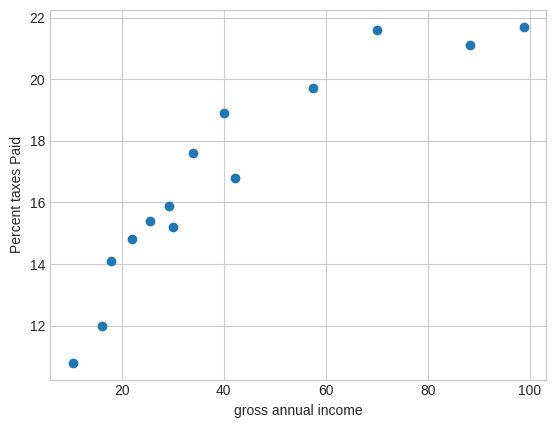

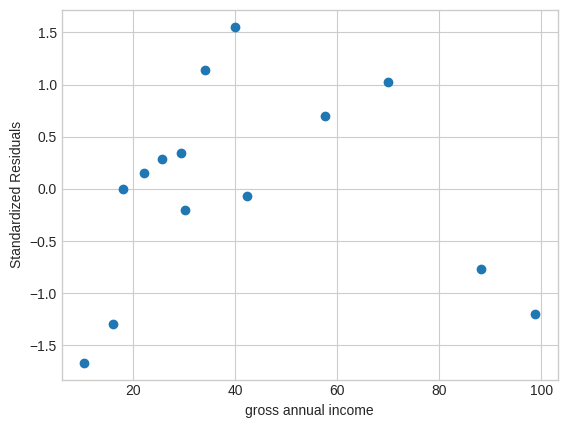

In [ ]:
def durbinwatson(n, k, alfa):

  # load durbin watson tables
  dw = pd.read_csv('/content/drive/MyDrive/datasets/dw.csv',  index_col= 0)
  dw = dw.loc[dw.k == k,['n', 'alpha', 'bound', 'd']]

  #calculate differences between n and alpha given values and table values
  dw['diffn'] = dw['n'] - n
  dw['diffa'] = dw['alpha'] - alfa
  dw['nside'] = 'None'
  dw['aside'] = 'None'

  #Identify if the differences between n and alpha given values and table values refer to lower or upper values
  dw.loc[dw['diffn'] > 0, 'nside' ] = 'upper'
  dw.loc[dw['diffn'] <= 0 ,'nside'] = 'lower'
  dw.loc[dw['diffa'] > 0, 'aside' ] = 'upper'
  dw.loc[dw['diffa'] <= 0 ,'aside'] = 'lower'

  # identifying nearest alpha and n values present in tables to interpolate between them
  px = dw[(dw.diffn == dw[dw.nside == 'upper']['diffn'].min()) | (dw.diffn == dw[dw.nside == 'lower']['diffn'].max())]

  #interpolating d for given n value
  a = px[px.nside == 'upper']['n']
  b = px[px.nside == 'lower']['n']
  percn = (n- px[px.nside == 'lower']['n']).values/(a.values - b.values)
  dgap = px[px.nside == 'upper']['d'].values - px[px.nside == 'lower']['d'].values
  px = px.drop(index = px.index[px.nside == 'upper'])
  px['d'] = px['d'] + (percn * dgap).tolist()
  px.drop(columns = ['diffn', 'nside', 'n'], inplace = True)

  #interpolating d for given alpha value
  a = px[px.aside == 'upper']['alpha']
  b = px[px.aside == 'lower']['alpha']
  percn = (alfa- px[px.aside == 'lower']['alpha']).values/(a.values - b.values)
  dgap = px[px.aside == 'upper']['d'].values - px[px.aside == 'lower']['d'].values
  px = px.drop(index = px.index[px.aside == 'upper'])
  px['d'] = px['d'] + (percn * dgap).tolist()
  px.drop(columns = ['diffa', 'aside', 'alpha'], inplace = True)

  return px[px.bound == 'dL']['d'].values[0], px[px.bound == 'dU']['d'].values[0]

def linreg(xp, x, B, resvar, n):
  squareddiffxp = (xp - np.nanmean(x))**2
  squareddiffx = (x - np.nanmean(x))**2
  sdymean = np.sqrt(resvar*((1/n)+(squareddiffxp/np.sum(squareddiffx))))#std deviation of the Y mean
  sdypart = np.sqrt(resvar*(1+(1/n)+(squareddiffxp/np.sum(squareddiffx)))) #std deviation of a particular x
  ymeanp = B[0,0] + B[1,0]*xp
  return ymeanp, sdymean, sdypart


def slmreg(x,xtitle, y, ytitle, alpha, xp):

  #general aggregates
  xy = x * y
  squaredx = x**2
  squaredy = y **2
  n = x.size

  Y = y[:, np.newaxis]
  X = np.hstack((np.ones((n,1)), x[:,np.newaxis]))
  unos = np.ones((18,1))
  Xprime = np.transpose(X)
  Yprime =np.transpose(Y)

  # matrices Calculation
  XprimeX = np.matmul(Xprime, X)
  XprimeY = np.matmul(Xprime,Y)
  InvXprimex = np.linalg.inv(XprimeX)
  B = np.matmul(InvXprimex, XprimeY)

  # X'X matrix

  matrix = """<math>
    <mrow>
        <mi>X</mi>
        <mo>&#x2032;</mo>
        <mi>X</mi>
        <mo>=</mo>
        <mo>[</mo>
          <mtable>"""
  for i in np.arange(XprimeX.shape[0]):
    matrix +="""
            <mtr>"""
    for j in np.arange(XprimeX.shape[1]):
      matrix +="""
              <mtd>
                <mn>{:.6f}</mn>
              </mtd>
              """.format(XprimeX[i,j])
    matrix +="""
                        </mtr>"""
  matrix += """
  </mtable>
        <mo>]</mo>
    </mrow>
    </math>
  """
  display(HTML(data = matrix))
  print("")

  # X'Y matrix
  matrix = """<math>
    <mrow>
        <mi>X</mi>
        <mo>&#x2032;</mo>
        <mi>Y</mi>
        <mo>=</mo>
        <mo>[</mo>
          <mtable>"""
  for i in np.arange(XprimeY.shape[0]):
    matrix +="""
            <mtr>"""
    for j in np.arange(XprimeY.shape[1]):
      matrix +="""
              <mtd>
                <mn>{:.6f}</mn>
              </mtd>
              """.format(XprimeY[i,j])
    matrix +="""
                        </mtr>"""
  matrix += """
  </mtable>
        <mo>]</mo>
    </mrow>
    </math>
  """
  display(HTML(data = matrix))
  print("")

  # inverse of X'X matrix
  matrix = """<math>
    <mrow>
    <msup>
      <mrow>
        <mo>(</mo>
          <mi>X</mi>
          <mo>&#x2032;</mo>
          <mi>X</mi>
        <mo>)</mo>
      </mrow>
      <mrow>
        <mo>-</mo>
        <mn>1</mn>
      </mrow>
    </msup>
        <mo>=</mo>
        <mo>[</mo>

          <mtable>"""
  for i in np.arange(InvXprimex.shape[0]):
    matrix +="""
            <mtr>"""
    for j in np.arange(InvXprimex.shape[1]):
      matrix +="""
              <mtd>
                <mn>{:.6f}</mn>
              </mtd>
              """.format(InvXprimex[i,j])
    matrix +="""
                        </mtr>"""
  matrix += """
  </mtable>
        <mo>]</mo>
    </mrow>
    </math>
  """
  display(HTML(data = matrix))
  print("")


  # B Matrix
  matrix = """<!DOCTYPE html>
  <html>
  <head>
      <title>2x2 Matrix in MathML</title>
  </head>
  <body>
      <math xmlns="http://www.w3.org/1998/Math/MathML">
          <mrow>
              <mi>B</mi>
              <mo>=</mo>
              <mo>[</mo>
              <mtable>
                  """

  for i in B:
      matrix += """
                  <mtr>
                      <mtd><mn>{:.6f}</mn></mtd>
                  </mtr>""".format(i[0])
  matrix += """
              </mtable>
              <mo>]</mo>
          </mrow>
      </math>
  </body>
  </html>
  """
  display(HTML(data = matrix))
  print("")


  #residuals
  yline = np.vstack((B[0,0]*np.ones(n),x*B[1,:]))
  ymean = np.nansum(yline, axis = 0)
  res = y - ymean
  squaredres = res**2
  resmean = np.nanmean(res)

  sumsquaredres = np.nansum(squaredres)
  res2 = np.concatenate((np.array([0]),res))
  durbinwatson = np.nansum((res[1:] - res2[1:-1])**2)/np.sum(squaredres)
  sloperegressivemodel = np.nansum((res[1:]*res2[1:-1]))/np.sum(squaredres)

  #var statistics about Coefficients

  resvar = np.nansum(squaredres)/(n-2) # residual Variance or MSE
  sdB0 = np.sqrt((resvar * np.nansum(squaredx))/(n*np.nansum(np.subtract(x, np.nanmean(x))**2))) #std dev of B0
  sdB1 = np.sqrt(resvar/np.nansum(np.subtract(x, np.nanmean(x))**2)) #std dev of B1 or standard Error

  T = t.ppf(1-(alpha/2), n-2)
  lB0 = sdB0*T
  lB1 = sdB1*T

  # ANOVA Analysis

  dfreg = 1
  dferror = n-2
  dftotal = n-1

  ssreg = np.nansum((ymean - np.nanmean(Y))**2)
  sserror = np.nansum((y - ymean)**2)
  sst = np.nansum((y-np.nanmean(y))**2)

  msreg = ssreg/dfreg
  mserror = sserror/dferror
  F = msreg/mserror

  fstat = f.ppf(1-alpha, dfreg, dferror)

  stdres = res/math.sqrt(mserror)

  #F

  #agregated results

  html_table = """<table style=" border: none;
                    border-collapse: collapse; width:65%; word-break: break-word;">
    <tr 	style ="border-bottom-style: solid; border-width: 1px; text-align: center">
      <th colspan ="9">Simple Linear Reggression Aggregates</th>
    </tr>
    <tr style =" border-width: 1px; height: 20px;">
      <th Style = "width:7%"></th>
      <th>{}</th>
      <th Style = "width:12%">{} </th>
      <th Style = "width:12%"></th>
      <th Style = "width:12%"></th>
      <th Style = "width:12%"></th>
      <th>Estimated {}</th>
      <th Style = "width:12%">Residual</th>
      <th Style = "width:12%">Squared Residual</th>
    </tr>
    <tr style ="border-bottom-style: solid; border-width: 1px; height: 20px;">
      <th></th>
      <th>
        <math>
          <msub>
            <mi>x</mi>
            <mi>i</mi>
          </msub>
        <math>
      </th>
      <th>
        <math>
          <msub>
            <mi>y</mi>
            <mi>i</mi>
          </msub>
          <math>
      </th>
      <th>
        <math>
          <msub>
            <mi>x</mi>
            <mi>i</mi>
          </msub>
          <msub>
            <mi>y</mi>
            <mi>i</mi>
          </msub>
          <math>
      </th>
      <th>
        <math>
          <msubsup>
            <mi>x</mi>
            <mi>i</mi>
            <mn>2</mn>
          </msubsup>
        <math>
      </th>
      <th>
        <math>
          <msubsup>
            <mi>y</mi>
            <mi>i</mi>
            <mn>2</mn>
          </msubsup>
          <math>
      </th>
      <th>
        <math>
          <msub>
          <mrow>
            <mover>
              <mi>y</mi>
              <mo>^</mo>
            </mover>
          </mrow>
          <mi>i</mi>
          </msub>
        <math>
      </th>
      <th>
        <math>
          <msub>
            <mi>y</mi>
            <mi>i</mi>
          </msub>
          <mo>-</mo>
          <msub>
          <mrow>
            <mover>
              <mi>y</mi>
              <mo>^</mo>
            </mover>
          </mrow>
          <mi>i</mi>
          </msub>
        <math>
      </th>
      <th>
        <math>
          <msup>
            <mrow>
              <mo>(</mo>
              <msub>
                <mi>y</mi>
                <mi>i</mi>
              </msub>
              <mo>-</mo>
              <msub>
              <mrow>
                <mover>
                  <mi>y</mi>
                  <mo>^</mo>
                </mover>
              </mrow>
              <mi>i</mi>
              </msub>
              <mo>)</mo>
            </mrow>
            <mn>2</mn>
          </msup>
        <math>
      </th>""".format(xtitle, ytitle, ytitle)
  for i in range(n):

    html_table +="""
    <tr style="height: 20px;">
      <td></td>
      <td style="text-align: center;">{:.4f}</td>
      <td style="text-align: center">{:.4f}</td>
      <td style="text-align: center">{:.4f}</td>
      <td style="text-align: center">{:.4f}</td>
      <td style="text-align: center;">{:.4f}</td>
      <td style="text-align: center">{:.4f}</td>
      <td style="text-align: center">{:.4f}</td>
      <td style="text-align: center;">{:.4f}</td>
        </tr>
        """.format(x[i], y[i], xy[i], squaredx[i], squaredy[i],
                ymean[i], res[i],squaredres[i])
  html_table += """<tr style="height: 10px;">
      <td></td>
    </tr>
    <tr style ="border-bottom-style: solid; border-width: 1px; height: 40px;">
      <th style="text-align: left;">Totals</th>
      <td style="text-align: center">{}</td>
      <td style="text-align: center">{:.4f}</td>
      <td style="text-align: center">{:.4f}</td>
      <td style="text-align: center;">{:.4f}</td>
      <td style="text-align: center">{:.4f}</td>
      <td style="text-align: center">{:.4f}</td>
      <td style="text-align: center;">{:.4f}</td>
      <td style="text-align: center;">{:.4f}</td>
    </tr>
  </table>""".format(np.nansum(x), np.sum(y), np.sum(xy),
                    np.sum(squaredx), np.sum(squaredy), np.sum(ymean), np.sum(res), np.sum(squaredres))

  display(HTML(data = html_table))
  print("")
  print("")
  print("")

  #Variance Table

  ymean, sdymean, sdypart = linreg(x, x, B, resvar, n)

  html_table = """<table style="width:50%; border: none;
                    border-collapse: collapse;">
    <tr style ="border-bottom-style: solid; border-width: 1px;">
      <th colspan = 6 >Variance table</th>
    </tr>
    <tr <!--style ="height: 40px;"-->>
      <th style="text-align: left;">Statistic</th>
      <th>Value</th>
      <th>Std Dev</th>
      <th>Variance</th>
      <th style="text-align: left; width:17%; word-break: break-word;">Lower confidence limit</th>
      <th style="text-align: left; width:17%; word-break: break-word;">Upper confidence limit</th>
    </tr>
    <tr style ="border-bottom-style: solid; border-width: 1px; height: 20px;">
      <td colspan = 4></td>
      <td colspan = 2 style="text-align: center">
        <math>
          <mn>1</mn>
          <mo>-</mo>
          <mi>&alpha;</mi>
          <mo>=</mo>
          <mn>{:.2f}</mn>
        <math>
      </td>
    </tr>
    <tr style="height: 40px;">
      <th style="text-align: center;">
        <math>
          <msub>
            <mi>B</mi>
            <mn>0</mn>
          </msub>
        <math>
      </th>
      <td style="text-align: center;">{:.6f}</td>
      <td style="text-align: center;">{:.6f}</td>
      <td style="text-align: center;">{:.6f}</td>
      <td style="text-align: center;">{:.6f}</td>
      <td style="text-align: center;">{:.6f}</td>
    </tr>
    <tr style="height: 40px;">
      <th style="text-align: center;border-bottom-style: solid;
            border-width: 1px;">
        <math>
          <msub>
            <mi>B</mi>
            <mn>1</mn>
          </msub>
        <math>
      </th>
      <td style="text-align: center;border-bottom-style: solid;
            border-width: 1px;">{:.6f}</td>
      <td style="text-align: center;border-bottom-style: solid;
            border-width: 1px;">{:.6f}</td>
      <td style="text-align: center;border-bottom-style: solid;
            border-width: 1px;">{:.6f}</td>
      <td style="text-align: center;border-bottom-style: solid;
            border-width: 1px;">{:.6f}</td>
      <td style="text-align: center;border-bottom-style: solid;
            border-width: 1px;">{:.6f}</td>
    </tr>
  </table>""".format(1-alpha,
                    B[0,0], sdB0, sdB0**2, B[0,0] - lB0, B[0,0] + lB0,
                    B[1,0], sdB1, sdB1**2, B[1,0] - lB1, B[1,0] + lB1)
  display(HTML(data = html_table))
  print("")
  print("")
  print("")

  #Prediction Average Interval table
  html_table = """<table style=" border: none;
                    border-collapse: collapse; width:65%; word-break: break-word;">
    <tr 	style ="border-bottom-style: solid; border-width: 1px; text-align: center">
      <th colspan ="4"> Prediction intervals for average {} </th>
    </tr>
    <tr style ="border-bottom-style: solid; border-width: 1px; height: 20px;">
      <th>
        <math>
          <msub>
            <mi>x</mi>
            <mi>p</mi>
          </msub>
        <math>
      </th>
      <th>
        <math>

              <mover>
                <mi>y</mi>
                <mo>^</mo>
              </mover>

          </msub>
        <math>
      </th>
      <th>
        <math>
          <mi>s</mi>
          <mo>(</mo>

              <mover>
                <mi>y</mi>
                <mo>^</mo>
              </mover>

          <mo>)</mo>
        <math>
      </th>
      <th>{:.0f}% prediction interval</th>
      """.format(xtitle, (1-alpha)*100)
  yavg, s1, s2 = linreg(xp, x, B, resvar, n)

  for i in range(xp.size):

    html_table +="""
    <tr style="height: 20px;">
      <td style="text-align: center;">{:.4f}</td>
      <td style="text-align: center">{:.4f}</td>
      <td style="text-align: center">{:.4f}</td>
      <td style="text-align: center">
        <math>
          <mo>(</mo>
          <mn>{:.4f}</mn>
          <mo>,</mo>
          <mn>{:.4f}</mn>
          <mo>)</mo>
        <math>
      </td>
    </tr>
        """.format(xp[i], yavg[i], s1[i], yavg[i] - T*s1[i], yavg[i] + T*s1[i])


  display(HTML(data = html_table))
  print("")
  print("")
  print("")

  #Particular prediction interval table
  if xp.size > 0:
    html_table = """<table style=" border: none;
                      border-collapse: collapse; width:65%; word-break: break-word;">
      <tr 	style ="border-bottom-style: solid; border-width: 1px; text-align: center">
        <th colspan ="4"> Prediction intervals for particular values of {} </th>
      </tr>
      <tr style ="border-bottom-style: solid; border-width: 1px; height: 20px;">
        <th>
          <math>
            <msub>
              <mi>x</mi>
              <mi>p</mi>
            </msub>
          <math>
        </th>
        <th>
          <math>
            <msub>
              <mrow>
                <mover>
                  <mi>y</mi>
                  <mo>^</mo>
                </mover>
              <mrow>
              <mn>part</mn>
            </msub>
          <math>
        </th>
        <th>
          <math>
            <mi>s</mi>
            <mo>(</mo>
            <msub>
              <mrow>
                <mover>
                  <mi>y</mi>
                  <mo>^</mo>
                </mover>
              <mrow>
              <mn>part</mn>
            </msub>
            <mo>)</mo>
          <math>
        </th>
        <th>{:.0f}% prediction interval</th>
        """.format(xtitle, (1-alpha)*100)
    yavg, s1, s2 = linreg(xp, x, B, resvar, n)

    for i in range(xp.size):

      html_table +="""
      <tr style="height: 20px;">
        <td style="text-align: center;">{:.4f}</td>
        <td style="text-align: center">{:.4f}</td>
        <td style="text-align: center">{:.4f}</td>
        <td style="text-align: center">
          <math>
            <mo>(</mo>
            <mn>{:.4f}</mn>
            <mo>,</mo>
            <mn>{:.4f}</mn>
            <mo>)</mo>
          <math>
        </td>
      </tr>
          """.format(xp[i], yavg[i], s2[i], yavg[i] - T*s2[i], yavg[i] + T*s2[i])


    display(HTML(data = html_table))
    print("")
    print("")
    print("")



  #ANOVA Table
  html_table = """<table style="width:50%; border: none;
                    border-collapse: collapse;">
    <tr style ="border-bottom-style: solid; border-width: 1px;">
      <th colspan = 5>ANOVA table</th>
    </tr>
    <tr style ="border-bottom-style: solid; border-width: 1px; height: 40px;">
      <th style="text-align: left;">Source of variation</th>
      <th>df</th>
      <th>SS</th>
      <th>MS</th>
      <th>F Statistic</th>
    </tr>
    <tr style="height: 40px;">
      <th style="text-align: left;">Regression</th>
      <td style="text-align: center">{}</td>
      <td style="text-align: center">{:.6f}</td>
      <td style="text-align: center">{:.6f}</td>
      <td rowspan = 2 style="text-align: center; border-bottom-style: solid
                              ;border-width: 1px;">
      {:.6f}</td>
    </tr>
    <tr style="height: 40px;">
      <th style="text-align: left;">Error</th>
      <td style="text-align: center; border-bottom-style: solid;
            border-width: 1px;">{}</td>
      <td style="text-align: center; border-bottom-style: solid;
            border-width: 1px;">{:.6f}</td>
      <td style="text-align: center; border-bottom-style: solid;
            border-width: 1px;">{:.6f}</td>
    </tr>
    <tr style ="border-bottom-style: solid; border-width: 1px; height: 40px;">
      <th style="text-align: left;">Total</th>
      <td style="text-align: center">{}</td>
      <td style="text-align: center">{:.6f}</td>
      <td colspan ="2" style="text-align: center">
        <math xmlns="http://www.w3.org/1998/Math/MathML">
              <msub>
                <mi>f</mi>
                <mrow>
                  <mn>{:.2f}</mn>
                  <mo>,</mo>
                  <mn>{}</mn>
                  <mo>,</mo>
                  <mn>{}</mn>
                </mrow>
              </msub>
              <mo>=</mo>
              <mn>{:.6f} </mn>
        </math>
      </td>
    </tr>
    <tr style="height: 40px;">
      <th colspan = 2 style="text-align: left; border-bottom-style: solid;
            border-width: 1px;">Coefficient of determination
        <math>
          <msup>
            <mi mathvariant="bold">r</mi>
            <mn mathvariant="bold">2</mn>
          </msup>
          <mo mathvariant="bold">=</mo>
          <mn>{:.6f}</mn>
        <math>
      </th>
      <th colspan = 3 style="text-align: left; border-bottom-style: solid;
            border-width: 1px;">Sample Correlation Coefficient
        <math>
          <mi mathvariant="bold">r</mi>
          <mo mathvariant="bold">=</mo>
          <mn>{:.6f}</mn>
        <math>
      </th>
    </tr>
  </table>""".format(dfreg, ssreg, msreg, F, dferror, sserror, mserror,
                    dftotal, sst, 1-alpha, dfreg, dferror, fstat,
                    1 -(sserror/sst), math.sqrt(1 -(sserror/sst)))

  display(HTML(data = html_table))
  print("")
  print("")
  print("")

  #residuals table

  ymean, sdymean, sdypart = linreg(x, x, B, resvar, n)

  html_table = """<table style="width:50%; border: none;
                    border-collapse: collapse;">
    <tr style ="border-bottom-style: solid; border-width: 1px;">
      <th colspan = 6 >residual analysis</th>
    </tr>
    <tr style ="border-bottom-style: solid; border-width: 1px; height: 20px;">
      <th style="text-align: left;">X</th>
      <th>Y</th>
      <th style="text-align: left; width:17%; word-break: break-word;">Predicted Y Value</th>
      <th style="text-align: left; width:17%; word-break: break-word;">St. Dev Pred. Y</th>
      <th>Residual</th>
      <th>ST. Residual</th>
    </tr>"""


  for i in range(x.size):

    html_table +="""
    <tr style="height: 20px;">
      <td style="text-align: center;">{:.2f}</td>
      <td style="text-align: center;">{:.2f}</td>
      <td style="text-align: center;">{:.6f}</td>
      <td style="text-align: center;">{:.6f}</td>
      <td style="text-align: center;">{:.6f}</td>
      <td style="text-align: center;">{:.6f}</td>
    </tr>""".format(x[i], y[i], ymean[i], sdymean[i], y[i] - ymean[i], ( y[i] - ymean[i])/math.sqrt(resvar))


  html_table +="""<tr style ="border-bottom-style: solid; border-width: 1px;">
      <th colspan = 6 ></th>
    </tr>
  </table>"""

  display(HTML(data = html_table))
  print("")
  print("")
  print("")

  #sample scatter & Regression graph
  exes = np.linspace(np.nanmin(x), np.nanmax(x), 100)
  fig, ax = plt.subplots()
  ymeanp, sdymean, sdypart = linreg(exes, x, B, resvar, n)
  ax.scatter(x, y)
  #ax.plot(exes,ymeanp, color ='red', label = 'Regression')
  #ax.plot(exes,ymeanp + T*sdymean, color ='blue', label =r'confidence Interval 1 - $\alpha$ = {}'.format(1-alpha))
  #ax.plot(exes,ymeanp - T*sdymean, color ='blue')
  #plt.legend()

  ax.set_xlabel(xtitle)
  ax.set_ylabel(ytitle);
  print("")
  print("")
  print("")

  #residual scatter graph
  fig, ax = plt.subplots()
  #xgraph = np.linspace(0, x.size, x.size )
  ax.scatter(x, stdres)
  ax.set_xlabel(xtitle)
  ax.set_ylabel('Standardized Residuals');

  return np.nansum((res[1:]*res2[1:-1]))/np.sum(squaredres)


#Book example
# x = np.array([2.95, 3.20, 3.40, 3.60, 3.20, 2.85, 3.10, 2.85,
#               3.05, 2.70, 2.75, 3.10, 3.15, 2.95, 2.75])
# xtitle = 'GPA'

# y = np.array([18.5, 20.0, 21.1, 22.4, 21.2, 15.0, 18.0,
#               18.8, 15.7, 14.4, 15.5, 17.2, 19.0, 17.2, 16.8])
# ytitle = 'Salary'

#example 12.1
# x = np.array([4, 4, 4, 4, 4, 6, 6, 6, 6, 8, 8, 8, 8, 8,
#               10, 10, 10, 12, 12, 12, 12, 12, 12])
# xtitle = 'thickness (in)'
# y = np.array([14.4, 14.8, 15.2, 14.3, 14.6, 14.5, 14.1, 14.6,
#               14.2, 13.8, 14.1, 13.7, 13.6, 14.0,
#               13.0, 13.4, 13.2, 13.1, 12.8, 12.9, 13.2, 13.3, 12.7])
# ytitle = 'KwH'

# sales example
# x = np.array([270.36, 258.38, 254.96, 259.70, 265.40, 274.98, 281.86, 285.78,
#               290.58, 290.18, 296.72, 292.32, 301.72, 305.42, 314.96, 321.10])
# xtitle = 'Industry'
# y = np.array([44.84, 42.97, 41.98, 42.75, 43.95, 45.65, 46.87, 47.35,
#               48.13, 47.95, 49.10, 48.52, 50.22, 51.15, 52.78, 53.91])
# ytitle = 'Company'

# exercise 13.5
# x = np.array([45, 20, 40, 40, 47, 30, 25, 20, 15,
#               35, 40, 55, 50, 60, 15, 30, 35, 45])
# xtitle = 'Income'
# y = np.array([70, 50, 60, 50, 90, 55, 55, 35, 40,
#               65, 75, 105, 110, 120, 30, 40, 65, 80])
# ytitle = 'Life insurance'

# exercise 13.11
# x = np.array([68, 67, 65, 68, 64, 67, 66, 65, 64, 66])
# xtitle = 'Height (in)'
# y = np.array([119, 118, 129, 135, 123, 140, 125, 132, 118, 130])
# ytitle = 'Weight (lbs)'

# exercise 13.14
x = np.array([25.6, 42.2, 57.6, 98.8, 10.4, 30.1, 40.0,
              29.3, 16.1, 18.0, 88.2, 34.0, 22.1, 70.0])
xtitle = 'gross annual income'
y = np.array([15.4, 16.8, 19.7, 21.7, 10.8, 15.2, 18.9,
              15.9, 12.0, 14.1, 21.1, 17.6, 14.8, 21.6])
ytitle = 'Percent taxes Paid'

#exercise 13.15
# x = np.array([1, 1, 1, 1, 2, 2, 2, 2,
#               3, 3, 3, 3, 4, 4, 4, 4])
# xtitle = 'Time Length (hours)'
# y = np.array([25, 29, 23, 31, 55, 65, 63, 59,
#               73, 75, 74, 71, 90, 88, 91, 87])
# ytitle = 'assembled units'

#exercise 13.17
# x = np.array([0.057, 0.058, 0.055, 0.052, 0.051,
#               0.055, 0.056, 0.047, 0.045, 0.044,
#               0.043, 0.043, 0.043, 0.043, 0.041,
#               0.040, 0.039, 0.038, 0.039, 0.035])
# xtitle = 'Relative price'
# y = np.array([7.09, 7.18, 7.23, 7.23, 7.32,
#               7.64, 7.73, 7.55, 7.91, 7.86,
#               7.96, 7.77, 8.14, 8.14, 8.23,
#               8.46, 8.73, 8.77, 9.18, 8.91])
# ytitle = 'per capita comsumption'

#exercise 13.19
# x = np.array([737.2, 756.6, 800.3, 832.5, 876.4, 929.3, 984.8,
#               1011.4, 1058.1, 1087.6, 1085.6, 1122.4, 1185.9, 1255.0,
#               1248.0, 1233.9, 1300.4, 1371.7, 1436.9, 1483.0, 1480.7])
# xtitle = 'Gross national product'
# y = np.array([452.0, 461.4, 482.0, 500.5, 528.0, 557.5, 585.7,
#               602.7, 634.4, 657.9, 672.1, 696.8, 737.1, 768.5,
#               763.6, 780.2, 823.7, 863.9, 904.8, 930.9, 935.1])
# ytitle = 'personal consumption expenditure'

#exercise 14.10 correlation matrix
# x = np.array([0.156, 0.205, 0.023, 0.042, 0.102, 0.147, 0.285, 0.024,
#                 0.038, 0.235, 0.076, 0.200, 0.056, 0.032, 0.068, 0.200])
# xtitle = 'x5'
# y = np.array([0.220, 0.297, 0.034, 0.058, 0.142, 0.202, 0.395, 0.036,
#                 0.056, 0.332, 0.107, 0.286, 0.077, 0.049, 0.094, 0.281])
# ytitle = 'x4'

# x5 = np.array([0.156, 0.205, 0.023, 0.042, 0.102, 0.147, 0.285, 0.024,
#                0.038, 0.235, 0.076, 0.200, 0.056, 0.032, 0.068, 0.200])

# x4 = np.array([0.220, 0.297, 0.034, 0.058, 0.142, 0.202, 0.395, 0.036,
#                0.056, 0.332, 0.107, 0.286, 0.077, 0.049, 0.094, 0.281])

# x3 = np.array([0.290, 0.369, 0.047, 0.081, 0.198, 0.267, 0.496, 0.047,
#                0.074, 0.425, 0.153, 0.364, 0.105, 0.072, 0.145, 0.380])

# x2 = np.array([0.310, 0.390, 0.058, 0.100, 0.213, 0.304, 0.518, 0.063,
#                0.092, 0.452, 0.178, 0.391, 0.124, 0.087, 0.161, 0.420])

# x1 = np.array([0.297, 0.360, 0.075, 0.114, 0.229, 0.315, 0.477, 0.072,
#                0.099, 0.420, 0.189, 0.369, 0.142, 0.094, 0.171, 0.378])
#slmreg(x,xtitle, y, ytitle, alpha, xp):
r = slmreg(x,xtitle, y, ytitle, 0.05, np.array([15]))
r

[199.2777378  214.42652261 220.98024252 237.7517871  251.30408309
 262.39654607 263.04290051 284.88431985 290.0009665  290.57292853
 307.0381141  333.01417632 341.043541   317.93416261 337.3757535
 371.24913945 386.22277129 403.81012762 406.19154239 395.2557215 ]
[329.08554935 361.53516907 368.39281761 393.61950601 421.06117125
 445.88358791 440.29822165 471.5724425  473.99034151 454.88280449
 492.84263751 535.00170997 567.27701163 520.20478083 510.1641964
 584.84101918 617.57657131 641.4285242  649.71796779 620.68381671]


0.18281581253360604

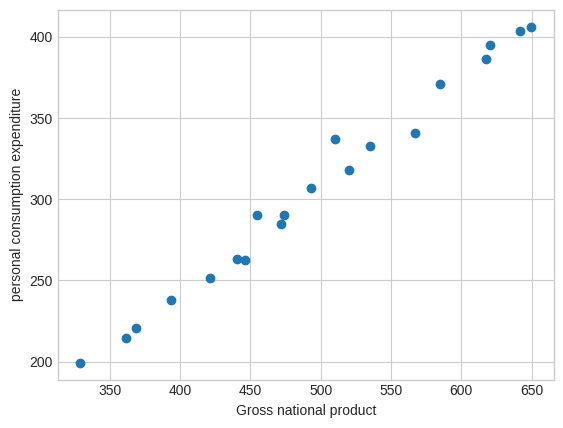

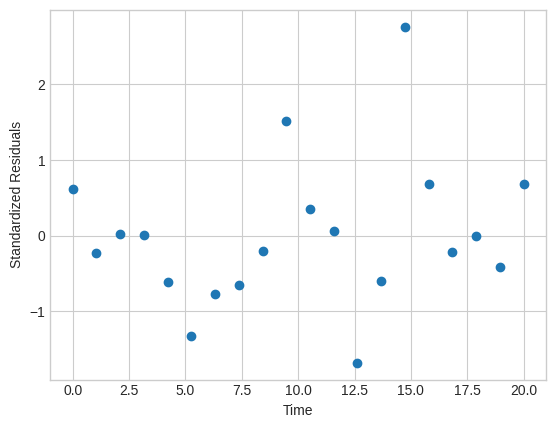

In [ ]:

yprime = y[1:]-(r*y[:-1])
xprime = x[1:]-(r*x[:-1])
print(yprime)
print(xprime)
slmreg(xprime,xtitle, yprime, ytitle, 0.05, np.array([]))

In [ ]:
-26.173286/(1-r)

-62.30496217821686

#General Linear model

In [ ]:
#Example 14.1

x4 = np.array([235, 307, 212, 365, 218, 235, 285, 205, 267, 300, 367, 351, 379,
               275, 365, 275, 360, 365, 395, 272, 424, 428, 273, 358, 444, 345,
               402, 410, 340, 347, 416, 407])

x3 = np.array([220, 231, 217, 316, 210, 267, 274, 190, 236, 220, 231, 284, 316,
               267, 274, 190, 236, 220, 231, 217, 284, 316, 210, 267, 274, 190,
               236, 220, 217, 210, 267, 190])

x2 = np.array([6.1, 4.8, 6.1, 0.2, 3.5, 1.8, 1.2, 8.6, 5.2, 6.1, 4.8, 2.4, 0.2,
              1.8, 1.2, 8.6, 5.2, 6.1, 4.8, 6.1, 2.4, 0.2, 3.5, 1.8, 1.2, 8.6,
              5.2, 6.1, 6.1, 3.5, 1.8, 8.6])

x1 = np.array([38.4, 40.3, 40.0, 31.8, 40.8, 41.3, 38.1, 50.8, 32.2, 38.4, 40.3,
               32.2, 31.8, 41.3, 38.1, 50.8, 32.2, 38.4, 40.3, 40.0, 32.2, 31.8,
               40.8, 41.3, 38.1, 50.8, 32.2, 38.4, 40.0, 40.8, 41.3, 50.8])

y = np.array([6.9, 14.4, 7.4, 8.5, 8.0, 2.8, 5.0, 12.2, 10.0, 15.2, 26.8, 14.0,
              14.7, 6.4, 17.6, 22.3, 24.8, 26.0, 34.9, 18.2, 23.2, 18.0, 13.1,
              16.1, 32.1, 34.7, 31.7, 33.6, 30.4, 26.6, 27.8, 45.7])

ytitle = "gasoline yield"
xtitle = ["API", "Crude Oil Vapor Pressure", "Crude Oil ASTM 10%", "gasoline ASTM end point"]
x = [x1, x2, x3, x4]
xp = np.array([0, 0, 0, 0])
name = [1, 2, 3, 4]
weightvar = [x1] #variable on which weighted sum of squares will be performed
alpha = 0.05

In [ ]:
#Example 14.3

# x2 = np.array([80, 95, 106, 115, 128, 128, 115, 92, 93,
#                111, 116, 117, 127, 133, 135, 136, 140, 142,
#                148, 150])

# x1 = np.array([87, 78, 81, 65, 51, 62, 70, 91, 94,
#                100, 102, 82, 74, 85, 86, 90, 93, 81,
#                72, 60])

# # x3 = np.square(x1)

# y = np.array([13.59, 15.71, 15.97, 20.21, 24.64, 21.25, 18.94, 14.85, 15.18,
#               16.30, 15.93, 16.45, 19.02, 18.16, 18.57, 17.01, 18.03, 19.22,
#               21.12, 23.32])

# ytitle = "Cost"
# xtitle = ["Production Rate", "Material and Labor Costs"]
# x = [x1, x2] #Variables to include in analysis
# xp = np.array([0, 0])# particular values of predictors to assess a particular prediction value
# alpha = 0.05 #alpha value for confidence interval

In [ ]:
#Example 14.6


x1 = np.array([70, 70, 70, 70, 70, 70, 70, 70, 70,
               75, 75, 75, 75, 75, 75, 75, 75, 75,
               80, 80, 80, 80, 80, 80, 80, 80, 80,
               85, 85, 85, 85, 85, 85, 85, 85, 85,
               90, 90, 90, 90, 90, 90, 90, 90, 90,
               95, 95, 95, 95, 95, 95, 95, 95, 95])
x2 = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80,
               0, 10, 20, 30, 40, 50, 60, 70, 80,
               0, 10, 20, 30, 40, 50, 60, 70, 80,
               0, 10, 20, 30, 40, 50, 60, 70, 80,
               0, 10, 20, 30, 40, 50, 60, 70, 80,
               0, 10, 20, 30, 40, 50, 60, 70, 80])

x11 = x1**2
x22 = x2**2
x12 = x1*x2

y = np.array([64, 65, 66,67, 68, 69, 70, 70, 71,
              69, 70, 72, 73, 74, 75, 76, 77, 78,
              73, 75, 77, 78, 79, 81, 82, 85, 86,
              78, 80, 82, 84, 86, 88, 90, 93, 97,
              83, 85, 87, 90, 93, 96, 100, 106, 113,
              87, 90, 93, 96, 101, 107, 114, 124, 136])

ytitle = "Apparent Temp"
xtitle = ["air temp", "rel Hum", "air temp squared", "rel hum squared", "air tem * rel hum"]
x = [x1, x2, x11, x22, x12] #Variables to include in analysis
xp = np.array([0, 0, 0, 0, 0])# particular values of predictors to assess a particular prediction value
name = [1, 2, 11, 22, 12] #subcripts to be written under each x value.  Should be equal to variable names in x
weightvar = [x1] #variable on which weighted sum of squares will be performed
alpha = 0.05 #alpha value for confidence interval

In [ ]:
#Example 14.8

x1 = np.array([-7.00, -7.00, - 7.00, -7.00, - 7.00, - 7.00,
               -7.00, -7.00, - 6.00, - 6.00, - 6.00, - 6.00,
               -6.00, -6.00, - 5.00, - 5.00, - 5.00, - 5.00,
               -5.00, -4.00, - 4.00, - 4.00, - 4.00, -4.00,
               -4.00, -3.00, - 3.00, - 3.00, - 3.00, - 2.00,
               -2.00, -2.00, - 1.00, - 1.00, - 1.00, 0.0,
               0.0, 0.0, 0.0, 1.00, 1.00, 1.00,
               2.00, 2.00, 2.00, 3.00, 3.00, 3.00,
               3.00, 4.00, 4.00, 4.00, 4.00, 5.00,
               5.00, 5.00, 6.00, 6.00, 6.00, 7.00,
               7.00])

x11 = x1**2




y = np.array([53.8, 53.3, 54.8, 54.6, 53.7, 55.2, 55.7, 54.1, 63.8, 64.2,
              66.9, 67.2, 65.4, 67.3, 71.8, 73.2, 75.6, 76.2, 72.7, 79.4,
              81.1, 85.2, 83.0, 84.1, 82.8, 90.3, 84.2, 88.3, 86.0, 93.2,
              97.4, 98.3, 102.8, 96.9, 98.2, 98.9, 96.1, 99.6, 91.4, 101.1,
              94.6, 95.9, 92.3, 96.6, 98.5, 93.6, 86.2, 87.9, 89.5, 74.8,
              82.3, 76.9, 81.2, 73.6, 65.4, 67.1, 60.2, 54.9, 50.8, 44.7,
              38.5])

ytitle = "Ozone"
xtitle = ["layer", "squared layer"]
x = [x1, x11] #Variables to include in analysis
xp = np.array([0, 0])# particular values of predictors to assess a particular prediction value
name = [1, 11] #subcripts to be written under each x value.  Should be equal to variable names in x
weightvar = [x1] #variable on which weighted sum of squares will be performed
alpha = 0.05 #alpha value for confidence interval

In [ ]:
df = pd.DataFrame({"y":y, "x1":x1, "x11":x11, "weights":np.diagonal(InvQ)})
df.to_csv("ozone.csv")

In [ ]:
np.diagonal(InvQ)


array([1.4957265 , 1.4957265 , 1.4957265 , 1.4957265 , 1.4957265 ,
       1.4957265 , 1.4957265 , 1.4957265 , 0.41186161, 0.41186161,
       0.41186161, 0.41186161, 0.41186161, 0.41186161, 0.27548209,
       0.27548209, 0.27548209, 0.27548209, 0.27548209, 0.23041475,
       0.23041475, 0.23041475, 0.23041475, 0.23041475, 0.23041475,
       0.14111007, 0.14111007, 0.14111007, 0.14111007, 0.13495277,
       0.13495277, 0.13495277, 0.10405827, 0.10405827, 0.10405827,
       0.07221955, 0.07221955, 0.07221955, 0.07221955, 0.08453085,
       0.08453085, 0.08453085, 0.09910803, 0.09910803, 0.09910803,
       0.09966777, 0.09966777, 0.09966777, 0.09966777, 0.07974482,
       0.07974482, 0.07974482, 0.07974482, 0.05339028, 0.05339028,
       0.05339028, 0.04502476, 0.04502476, 0.04502476, 0.05202914,
       0.05202914])

In [ ]:
#exercise 13.5
# x1 = np.array([45, 20, 40, 40, 47, 30, 25, 20, 15,
#               35, 40, 55, 50, 60, 15, 30, 35, 45])
# xtitle = ['Income']

# y = np.array([70, 50, 60, 50, 90, 55, 55, 35, 40,
#               65, 75, 105, 110, 120, 30, 40, 65, 80])
# ytitle = 'Life insurance'


# x = [x1]
# xp = np.array([58])
# name = [1]
# alpha = 0.05

In [ ]:
# Ejerc 14.5

# x2 = np.array([3, 4, 5, 4, 4,
#                3, 6, 5, 3, 2,
#                4, 3, 2, 3, 4])

# x1 = np.array([2.1, 1.1, 0.9, 1.6, 6.2,
#               2.3, 1.8, 1.0, 8.9, 2.4,
#               1.2, 4.7, 3.5, 2.9, 1.4])

# y = np.array([0.43, 0.31, 0.32, 0.46, 1.25,
#                0.44, 0.52, 0.29, 1.29, 0.35,
#                0.35, 0.78, 0.43, 0.47, 0.38])
# ytitle = "monthly food expenditure"
# xtitle = ["monthly income", "family size"]
# x = [x1, x2]
# xp = np.array([2.5, 4])
# name = [1, 2]
# alpha = 0.02

In [ ]:
# Ejerc 14.13

# x1 = np.array([25.6, 42.2, 57.6, 98.8, 10.4, 30.1, 40.0,
#               29.3, 16.1, 18.0, 88.2, 34.0, 22.1, 70.0])

# x2 = x1**2

# y = np.array([15.4, 16.8, 19.7, 21.7, 10.8, 15.2, 18.9,
#               15.9, 12.0, 14.1, 21.1, 17.6, 14.8, 21.6])

# ytitle = 'Percent taxes Paid'
# xtitle = ['gross annual income', 'squared gross annual income']
# x = [x1, x2]
# xp = np.array([250, 250*250])
# name = [1, 2]
# alpha = 0.02

#ejerc 14.9

In [ ]:
# Ejerc 14.9
# x4 = np.array([89, 78, 90, 95, 109, 88, 108, 105, 88, 84,
#                110, 87, 97, 100, 95, 102, 102, 103, 108, 74])

# x3 = np.array([96, 98, 95, 93, 109, 90, 102, 106, 95, 95,
#                107, 100, 105, 99, 108, 116, 100, 103, 113, 80])

# x2 = np.array([121, 115, 115, 117, 102, 96, 129, 119, 101, 95,
#                118, 110, 89, 108, 125, 122, 83, 101, 120, 77])

# x1 = np.array([122, 108, 120, 118, 113, 112, 109, 112, 115, 111,
#                119, 112, 120, 117, 109, 116, 104, 110, 117, 120])

# y = np.array([94, 71, 82, 76, 111, 64, 109, 104, 80, 73,
#               127, 88, 99, 80, 99, 116, 100, 96, 126, 58])

# ytitle = "job effectiveness"
# xtitle = ["test 3", "test 4"]
# x = [x1, x2, x3, x4]
# xp = np.array([105, 110, 99, 107])
# name = [1, 2, 3, 4]
# alpha = 0.05

In [ ]:
# Ejerc 14.11
# x5 = np.array([0.156, 0.205, 0.023, 0.042, 0.102, 0.147, 0.285, 0.024,
#                0.038, 0.235, 0.076, 0.200, 0.056, 0.032, 0.068, 0.200])

# x4 = np.array([0.220, 0.297, 0.034, 0.058, 0.142, 0.202, 0.395, 0.036,
#                0.056, 0.332, 0.107, 0.286, 0.077, 0.049, 0.094, 0.281])

# x3 = np.array([0.290, 0.369, 0.047, 0.081, 0.198, 0.267, 0.496, 0.047,
#                0.074, 0.425, 0.153, 0.364, 0.105, 0.072, 0.145, 0.380])

# x2 = np.array([0.310, 0.390, 0.058, 0.100, 0.213, 0.304, 0.518, 0.063,
#                0.092, 0.452, 0.178, 0.391, 0.124, 0.087, 0.161, 0.420])

# x1 = np.array([0.297, 0.360, 0.075, 0.114, 0.229, 0.315, 0.477, 0.072,
#                0.099, 0.420, 0.189, 0.369, 0.142, 0.094, 0.171, 0.378])

# y = np.array([17, 17, 35, 69, 69, 173, 173, 17,
#               17, 73, 17, 35, 69, 35, 35, 52])

# ytitle = "Feldspar concentration"
# xtitle = ["band 1", "band 2", "band 3", "band 4", "band 5"]
# x = [x2, x3]
# xp = np.array([.5, .5])
# name = [2, 3]
# alpha = 0.02

In [ ]:
# Ejerc 14.16, 14.17
x5 = np.array([6, 8, 6, 8, 7, 1, 2, 5, 5, 7,
               3, 3, 4, 4, 6, 6, 1, 2, 1, 3,
               4, 6, 4, 7, 4, 8, 1, 2, 8, 2,
               5, 4, 3, 6, 7, 2, 1, 5, 4, 6,
               6, 7, 1, 5, 7, 5, 3, 7])

x4 = np.array([10.2, 15.7, 9.1, 16.8, 19.4, 18.3, 15.5, 13.7, 12.3, 13.5,
               13.7, 11.0, 12.8, 14.6, 10.0, 11.5, 13.6, 18.6, 16.8, 12.6,
               13.2, 11.5, 11.8, 14.2, 12.8, 13.1, 15.3, 14.9, 15.3, 16.0,
               11.8, 12.2, 11.5, 11.7, 15.4, 11.9, 14.9, 10.4, 11.4, 10.5,
               13.7, 17.5, 15.6, 16.4, 16.1, 9.2, 12.7, 14.5])


x3 = np.array([7.4, 9.8, 6.6, 8.2, 5.6, 7.1, 8.9, 9.0, 6.9, 6.3,
               6.5, 5.7, 4.0, 4.0, 4.6, 7.0, 8.9, 6.8, 9.5, 8.2,
               5.9, 7.4, 6.2, 6.2, 5.0, 9.0, 6.4, 9.4, 7.8, 9.1,
               6.2, 5.5, 7.8, 5.0, 9.5, 7.9, 8.6, 5.0, 3.6, 6.0,
               5.7, 5.3, 8.0, 5.6, 8.8, 7.5, 4.5, 3.6])

x2 = np.array([25.8, 9.2, 18.4, 12.0, 4.7, 6.6, 15.2, 14.9, 26.5, 1.8,
               14.7, 7.6, 1.6, 5.6, 7.5, 30.2, 0.7, 21.1, 4.3, 12.5,
               2.0, 36.4, 11.2, 4.8, 3.8, 8.3, 0.7, 12.8, 9.8, 14.6,
               23.1, 3.3, 10.1, 11.3, 3.0, 9.4, 3.7, 31.2, 6.1, 15.9,
               13.1, 2.5, 0.8, 19.5, 5.1, 3.9, 3.9, 3.1])

x1 = np.array([58.4, 79.6, 50.0, 90.9, 78.5, 77.4, 72.2, 80.5, 60.3, 54.1,
               83.0, 64.9, 57.2, 66.1, 52.3, 66.1, 50.8, 76.6, 84.6, 73.8,
               66.4, 44.5, 70.1, 53.4, 61.5, 80.9, 56.4, 88.9, 69.8, 88.9,
               45.0, 44.3, 75.3, 68.0, 67.1, 71.5, 87.1, 47.6, 44.6, 58.7,
               79.7, 80.4, 32.2, 63.1, 72.6, 39.0, 65.9, 60.5])

y = np.array([14.2, 9.5, 8.8, 11.5, 6.3, 4.2, 6.0, 10.2, 11.7, 5.5,
              9.9, 7.4, 2.3, 6.6, 10.1, 15.5, 2.4, 8.0, 3.1, 9.3,
              2.7, 14.3, 9.6, 5.4, 3.9, 15.8, 3.2, 5.6, 8.8, 10.7,
              10.6, 0.9, 7.8, 8.6, 4.9, 5.6, 3.9, 11.9, 2.0, 10.1,
              13.3, 3.5, 1.4, 9.0, 4.3, 6.0, 2.8, 5.4])

ytitle = "% urban population"
# xtitle = ["% urban population", "% minority population",
#           "% population 4+ years college", "geographic region"]
xtitle = ["% minority population",
          "% population 4+ years college", "geographic region"]
x = [x1, x2, x3, x4, x5] #Variables to include in analysis
xp = np.array([0, 0, 0, 0, 0]) # particular values of predictors to assess a particular prediction value
name = [1, 2, 3, 4, 5] #subcripts to be written under each x value.  Should be equal to variable names in x
alpha = 0.02 #alpha value for confidence interval
weightvar = [x5] #variable on which weighted sum of squares will be performed

In [ ]:
df = pd.DataFrame({"y":y, "x1":x1, "x2":x2, "x3":x3, "x4":x4, "x5":x5})
#df.to_csv("crimedata.csv")
df.corr()

,y,x1,x2,x3,x4,x5
y,1.000000,0.175761,0.781471,0.153530,-0.291105,0.447354
x1,0.175761,1.000000,-0.052467,0.413666,0.546816,-0.040641
x2,0.781471,-0.052467,1.000000,0.076183,-0.299783,0.157743
x3,0.153530,0.413666,0.076183,1.000000,0.268966,-0.140087
x4,-0.291105,0.546816,-0.299783,0.268966,1.000000,-0.108502
x5,0.447354,-0.040641,0.157743,-0.140087,-0.108502,1.000000


In [ ]:
# Ejerc 14.15

# x1 = np.array([[14.2, 58.4, 25.8, 7.4, 10.2, 6],[95, 79.6, 9.2, 9.8, 15.7, 8]])



# ytitle = "Jan mean atmosferic temperature"
# xtitle = ["latitude", "longitude", "elevation"]
# x = [x1]
# xp = np.array([0])
# name = [1]
# alpha = 0.02

In [ ]:
dferror

43

3.158641993008672 42 [[132.66296371]]





4.334139936500391 42 [[182.03387733]]


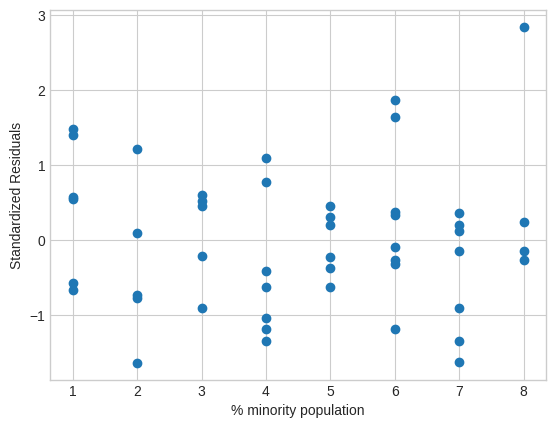

In [ ]:
def anovatable(title, x, y, B, name, dfreg, SSR, dferror,
               SSE, k, InvXprimeX):
  #aditional anova calc
  SST = SSR + SSE
  MSR = SSR/dfreg
  MSE = (SSE/dferror)[0][0] #MSE


  # F Value calcs
  F = MSR/MSE
  fstat = f.ppf(1-alpha, dfreg, dferror)
  pvaluef = 1- f.cdf(F[0][0], dfreg, dferror)#p value of F

  #r
  rsquared = SSR/SST #coefficient of multiple determination
  r = np.sqrt(rsquared) #correlation coefficient for general model

  dftotal = dfreg + dferror #total degrees of freedom

  c = np.diag(InvXprimeX)
  VarB = c*MSE #coefficient variance vector

  T = B/np.sqrt(VarB)[:,np.newaxis] #T-test value for coefficients vector Ho:B=0
  pvaluet = 2* (1 - t.cdf(np.abs(T), dferror)) #p-value for coefficient vector Ho:B=0

  print (MSE, dferror, SSE)
  stdev = math.sqrt(MSE) #std deviation of the model

  Avgy = np.nanmean(y) #average of Y
  CV = stdev / Avgy #Ratio of std dev to mean of Y.  Should be low

  #type I and IV Sum of squares
  datax = [x[0]]
  SSRTI = ssr(datax, y) # type I sum of square first value
  if len(x) > 1:
    SSRT4 = sse(x[1:len(x)],y) - SSE# type IV sum of square first value
  else:
    SSRT4 = [[0]]
  for i  in range(1, k):
    datax.append(x[i])
    SSRTI = np.hstack((SSRTI, sse(datax[:i],y) - sse(datax[:i+1],y))) #type I SS matrix
    if len(x) > 1:
      datax2 = x.copy()
      datax2.pop(i)
      SSRT4 = np.hstack((SSRT4, sse(datax2,y) - SSE)) #type IV SS matrix

  FvalueI = SSRTI / MSE
  if len(x) > 1:
    Fvalue4 = SSRT4 / MSE
  else:
    Fvalue4 = [[0]]
  FtestI = 1- f.cdf(FvalueI, 1, dferror)
  if len(x) > 1:
    Ftest4 = 1- f.cdf(Fvalue4, 1, dferror)
  else:
    Ftest4 = [[0]]

  #Output for linear regression
  html_table = """<style>
  td {
    font-size: 0.8755em;
  }
  th {
    font-size: 0.8755em;
  }
  mi, mo, mn {
    font-weight: bold;
  }
  </style>
  <body>"""
  html_table +="""
  <table style="width:65%; border: none;
                    border-collapse: collapse; word-break: break-word;">
    <tr>
      <td colspan = 9 style="text-align: left; height: 30px;">
      {}
      </td>
    </tr>
    <tr>
      <td colspan = 9 style="text-align: left; height: 30px;">ESTIMATED REGRESSION EQUATION:
        <math>
          <mi>Y</mi><mo>=</mo>""".format(title)
  if B[0][0] < 0:
    html_table +="""<mo>-</mo>"""
  html_table +="""<mn>{:.4f}</mn>""".format(np.abs(B)[0][0])

  for i in range(1, len(B)):
    if B[i][0] < 0:
      html_table +="""<mo>-</mo>"""
    else:
      html_table +="""<mo>+</mo>"""
    html_table += """<mn>{:.4f}</mn>
                    <msub>
                      <mi>X</mi>
                      <mn>{}</mn>
                    </msub>""".format(np.abs(B)[i][0], name[i-1])

  html_table +="""
        </math>
    </td>
    </tr>
    <tr>
      <td colspan = 9 style="text-align: left; height: 30px;">DEPENDENT VARIABLE: Y</td>
    </tr>
    <tr>
      <th style="text-align: left; height: 30px; width:18%;">SOURCE</th>
      <th style="text-align: center; width:4%;">DF</th>
      <th style="text-align: right; width:17%;">SUM OF SQUARES</th>
      <th colspan = 2 style="text-align: right; width:17%;">MEAN SQUARE</th>
      <th style="text-align: right; width:10%;">F VALUE</th>
      <th>PR > F</th>
      <th>R-SQUARED</th>
      <th>CV</th>
    </tr>
    <tr>
      <td style="text-align: left; height: 30px;">MODEL</td>
      <td style="text-align: center;">{}</td>
      <td style="text-align: right;">{:.6f}</td>
      <td colspan = 2 style="text-align: right;">{:.6f}</td>
      <td style="text-align: right;">{:.3f}</td>
      <td style="text-align: center;">{:.4f}</td>
      <td style="text-align: center;">{:.6f}</td>
      <td style="text-align: center;">{:.6f}</td>
    </tr>
    <tr>
      <td style="text-align: left; height: 30px;">ERROR</td>
      <td style="text-align: center;">{}</td>
      <td style="text-align: right;">{:.6f}</td>
      <td colspan = 2 style="text-align: right;">{:.6f}</td>
      <td></td>
      <th>STD DEV</th>
      <td></td>
      <th>Y MEAN</th>
    </tr>
    <tr>
      <td style="text-align: left; height: 30px;">CORRECTED TOTAL</td>
      <td style="text-align: center;">{}</td>
      <td style="text-align: right;">{:.6f}</td>
      <td colspan = 2 style="text-align: right;"></td>
      <td></td>
      <td>{:.6f}</td>
      <td></td>
      <td>{:.6f}</td>
    </tr>
      <tr><td style="height: 30px;"></td></tr>
    <tr>
      <th style="text-align: left; height: 30px;">SOURCE</th>
      <th>DF</th>
      <th>TYPE I SS</th>
      <th>F VALUE</th>
      <th>PR > F</th>
      <th>DF</th>
      <th>TYPE IV SS</th>
      <th>F VALUE</th>
      <th>PR > F</th>
    </tr>""".format(dfreg, SSR[0][0], MSR[0][0], F[0][0], pvaluef, rsquared[0][0], CV,
                    dferror, SSE[0][0], MSE,
                    dftotal, SST[0][0], stdev, Avgy)
  for i in range(k):
    html_table += """<tr style="text-align: left;">
      <th>
        <math>
          <msub>
            <mi style="font-weight: normal;">X</mi>
            <mn style="font-weight: normal;">{}</mn>
          </msub>
        <math>
      </th>
      <td style="text-align: center;">1</td>
      <td style="text-align: center;">{:.4f}</td>
      <td style="text-align: center;">{:.4f}</td>
      <td style="text-align: center;">{:.4f}</td>
      <td style="text-align: center;">1</td>
      <td style="text-align: center;">{:.4f}</td>
      <td style="text-align: center;">{:.4f}</td>
      <td style="text-align: center;">{:.4f}</td>
    </tr>
    """.format(name[i], SSRTI[0][i], FvalueI[0][i], FtestI[0][i], SSRT4[0][i], Fvalue4[0][i], Ftest4[0][i])

  html_table +="""
    <tr><td style="height: 30px;"></td></tr>
    <tr>
      <th style="text-align: left;">PARAMETER</th>
      <th colspan = 2  style="text-align: center;">ESTIMATE</th>
      <th colspan = 2>T FOR HO: PARAMETER = 0</th>
      <th colspan = 2>
        <math>
          <mi>PR</mi>
          <mo>&gt;</mo>
          <mo>|</mo>
          <mi>T</mi>
          <mo>|</mo>
        <math>
      </th>
      <th colspan = 2>STD ERROR OF ESTIMATE</th>
    </tr>
    <tr>
      <td>INTERCEPT</td>
      <td colspan = 2 style="text-align: center;">{:.6f}</td>
      <td colspan = 2 style="text-align: center;">{:.4f}</td>
      <td colspan = 2 style="text-align: center;">{:.6f}</td>
      <td colspan = 2 style="text-align: center;">{:.6f}</td>
    </tr>""".format(B[0][0], T[0][0], pvaluet[0][0], math.sqrt(VarB[0]))

  for i in range(1,k+1):
    html_table +="""
    <tr>
      <th style="text-align: left;">
        <math>
          <msub>
            <mi style="font-weight: normal;">X</mi>
            <mn style="font-weight: normal; ">{}</mn>
          </msub>
        <math>
      </th>
      <td colspan = 2 style="text-align: center;">{:.6f}</td>
      <td colspan = 2 style="text-align: center;">{:.4f}</td>
      <td colspan = 2 style="text-align: center;">{:.6f}</td>
      <td colspan = 2 style="text-align: center;">{:.6f}</td>
    </tr>""".format(name[i-1], B[i][0], T[i][0], pvaluet[i][0], math.sqrt(VarB[i]))

  html_table +="""
  </table>
  </body>"""

  display(HTML(data = html_table))
  print("")
  print("")
  print("")

def sums(x, y):
  #x and y data standardized for model
  X = np.ones(x[0].size)[:,np.newaxis]
  for i in x:
    X = np.hstack((X, i[:,np.newaxis])) # X matrix for calculations

  xdata = X[:,1:] #a matrix with all x data

  Y = y[:,np.newaxis] #Y matrix for calculations
  Xprime = np.transpose(X)
  Yprime = np.transpose(Y)
  XprimeX = np.matmul(Xprime, X)
  XprimeY = np.matmul(Xprime,Y)
  YprimeY = np.matmul(Yprime,Y)
  InvXprimeX = np.linalg.inv(XprimeX)

  #B matrix calculation
  B = np.matmul(InvXprimeX, XprimeY) # coefficient matrix
  Bprime = np.transpose(B)

  return X, Y, Xprime, Yprime, XprimeX, XprimeY, YprimeY, InvXprimeX, B, Bprime


def ssr(x, y):
  X, Y, Xprime, Yprime, XprimeX, XprimeY, YprimeY, InvXprimeX, B, Bprime = sums(x, y)
  return np.array([[np.sum((np.matmul(X, B)-np.mean(Y))**2)]])

def sse(x, y):
  X, Y, Xprime, Yprime, XprimeX, XprimeY, YprimeY, InvXprimeX, B, Bprime = sums(x, y)
  return np.array([[np.sum((Y - np.matmul(X, B))**2)]])



#entradas para la función de cálculo (lista de cadax, y, alpha, xp )
#preparing matrices and general data for calculation
k = len(x) #Number of predictor variables
m = k + 1 #number of linear parameters
n = x[0].size #sample size

#matrix for calculations
X, Y, Xprime, Yprime, XprimeX, XprimeY, YprimeY, InvXprimeX, B, Bprime = sums(x, y)
if np.nansum(xp) != 0:
  XPprime = np.hstack((np.array((1)), xp))
  XP = XPprime[:,np.newaxis]
else:
  XPprime = np.hstack((np.array((0)), xp))
  XP = XPprime[:,np.newaxis]


#ANOVA Calculations
dfreg = k
dferror = n - m
dftotal = n - 1

SSR = ssr(x, y)
SSE = sse(x, y)

MSE = (SSE/dferror)[0][0] #MSE


# anova table output
anovatable("ANOVA TABLE", x, y, B, name, dfreg, SSR, dferror,
               SSE, k, InvXprimeX)

tstat = t.ppf(1-(alpha/2), dferror) #tstat for confidence interval calc

#var and std deviation for prediction curve and particular point
VarYavg = MSE*np.matmul(np.matmul(XPprime,InvXprimeX),XP)
VarYpart = MSE*(1+np.matmul(np.matmul(XPprime,InvXprimeX),XP))
stdevYavg = np.sqrt(VarYavg)
stdevYpart = np.sqrt(VarYpart)

#residuals
yestimated = np.matmul(X,B).reshape((1, n))[0]
res = y - yestimated
stdres= res/np.sqrt(MSE)


#Mallows Cp calculations

predictor_combinations = []
for i in range(k):
    predictor_combinations += list(combinations(x, i))

predictor_combinations_names = []
for i in range(k):
    predictor_combinations_names += list(combinations(name, i))

#Cp table calculations for all combinations except all predictors together
cptable=[]
for xcomb, j in zip(predictor_combinations[1:], predictor_combinations_names[1:]):
  kcomb = len(xcomb) #Number of predictor variables for the combination
  mcomb = kcomb + 1 #number of linear parameters for the combination

  dferrorcomb = n - mcomb

  SSRcomb = ssr(xcomb, y)
  SSEcomb = sse(xcomb, y)
  SSTcomb = SSRcomb + SSEcomb

  MSEcomb = (SSEcomb/dferrorcomb)[0][0] #MSE

  #rsquared
  rsquaredcomb = SSRcomb/SSTcomb #coefficient of multiple determination

  #Mallow´s Cp
  Cp = (SSEcomb[0][0]/MSE)-(n - 2*mcomb)

  #adding current combination results to Cp table
  cptable.append([j, SSEcomb[0][0], MSEcomb, Cp, rsquaredcomb[0][0], mcomb])

#Cp table calculations for all predictors together combination
Cpall = (SSE[0][0]/MSE)-(n - 2*m)
rsquared = SSR/(SSR + SSE)
cptable.append([name, SSE[0][0], MSE, Cpall, rsquared[0][0], m])


#ANOVA Calculations for weighted least squares scenario
InvQ = []
for i in weightvar[0]:
  mask = weightvar[0] == i
  InvQ.append(1/np.var(y[mask], ddof = 1))
InvQ = np.diagflat(InvQ)
Bw = np.matmul(np.matmul(np.matmul(np.linalg.inv(np.matmul(np.matmul(Xprime,InvQ), X)), Xprime), InvQ), Y)
Bprimew = np.transpose(Bw)
SSRw = np.matmul(Bprimew, XprimeY) - ((np.nansum(Y)**2)/x[0].size)
SSEw = np.array([[np.sum((Y - np.matmul(X, Bw))**2)]])

# Find the index of the list
lindex = next((i for i, lst in enumerate(x) if np.array_equal(x, weightvar[0])), -1)
title = "ANOVA TABLE FOR WEIGHTED LEAST SQUARES ON X{}".format(name[lindex])

# anova table output
anovatable(title, x, y, Bw, name, dfreg, SSRw, dferror, SSEw, k, InvXprimeX)

#Particular prediction interval table
if xp.size > 0:
  html_table = """<table style=" border: none;
                      border-collapse: collapse; width:65%; word-break: break-word;">
      <tr 	style ="border-bottom-style: solid; border-width: 1px; text-align: center">
        <th colspan ="4"> Prediction intervals for particular values of {} </th>
      </tr>
      <tr style ="border-bottom-style: solid; border-width: 1px; height: 20px;">
        <th>
          <math>
            <msub>
              <mi>x</mi>
              <mi>p</mi>
            </msub>
          </math>
        </th>
        <th>
          <math>
            <msub>
              <mrow>
                <mover>
                  <mi>y</mi>
                  <mo>^</mo>
                </mover>
              <mrow>
              <mn>part</mn>
            </msub>
          <math>
        </th>
        <th>
          <math>
            <mi>s</mi>
            <mo>(</mo>
            <msub>
              <mrow>
                <mover>
                  <mi>y</mi>
                  <mo>^</mo>
                </mover>
              <mrow>
              <mn>part</mn>
            </msub>
            <mo>)</mo>
          </math>
        </th>
        <th>{:.0f}% prediction interval</th>
        """.format(xtitle, (1-alpha)*100)

  yavg = np.sum(XP*B)
  predictors = ""
  for i in range(xp.size):
    predictors += str(xp[i])+","
  predictors = predictors[:-1]
  html_table +="""
  <tr style="height: 20px;">
    <td style="text-align: center;">{}</td>
    <td style="text-align: center">{:.4f}</td>
    <td style="text-align: center">{:.4f}</td>
    <td style="text-align: center">
      <math>
        <mo>(</mo>
        <mn>{:.4f}</mn>
        <mo>,</mo>
        <mn>{:.4f}</mn>
        <mo>)</mo>
      </math>
    </td>
  </tr>
      """.format(predictors, yavg, stdevYpart[0], yavg - tstat*stdevYpart[0], yavg + tstat*stdevYpart[0])

html_table +="""
</table>"""

display(HTML(data = html_table))
print("")
print("")
print("")

#Mallow´s Cp table for best predictors

html_table = """<table style="width:50%; border: none;
                  border-collapse: collapse;">
  <tr style ="border-bottom-style: solid; border-width: 1px;">
    <th colspan = 6 >Goodness of fit for all possible regressions</th>
  </tr>
  <tr style ="border-bottom-style: solid; border-width: 1px; height: 20px;">
    <th>predictor variables</th>
    <th>
      <math>
        <msup>
        <mi>R</mi>
        <mn>2</mn>
        </msup>
      </math>
    </th>
    <th>SSE</th>
    <th>MSE</th>
    <th>
      <math>
        <msub>
        <mi>C</mi>
        <mi>p</mi>
        </msup>
      </math>
    </th>
    <th>
    <math>
        <mi>P</mi>
        <mo>-</mo>
        <msub>
        <mi>C</mi>
        <mi>p</mi>
        </msub>
      </math>
    </th>
  </tr>"""


for i in cptable:
  html_table +="""
  <tr style="height: 20px;">
    <td style="text-align: left;">
      <math>"""
  predvar =""
  for j in i[0]:
    predvar +="<msub><mi>X</mi><mn>{}</mn></msub><mo>, </mo>".format(j)
  predvar = predvar[:-11]
  html_table += predvar
  html_table +="""
    </math>
    </td>
    <td style="text-align: center;">{:.4f}</td>
    <td style="text-align: center;">{:.2f}</td>
    <td style="text-align: center;">{:.2f}</td>
    <td style="text-align: center;">{:.2f}</td>
    <td style="text-align: center;">{:.2f}</td>
  </tr>""".format(i[4], i[1], i[2], i[3], i[3] - i[5])


html_table +="""<tr style ="border-bottom-style: solid; border-width: 1px;">
    <th colspan = 6 ></th>
  </tr>
</table>"""

display(HTML(data = html_table))
print("")
print("")
print("")

#residual scatter graph
fig, ax = plt.subplots()
#xgraph = np.linspace(0, x.size, x.size )
ax.scatter(x5, stdres)
ax.set_xlabel(xtitle[0])
ax.set_ylabel('Standardized Residuals');

In [ ]:
[math.sqrt(i[4]) for i in cptable]

[0.052466520340361186,
 0.4136656048999011,
 0.5468160892884805,
 0.04064101275025947,
 0.42215300792924765,
 0.5591581181778965,
 0.06186230363465769,
 0.6128790754401479,
 0.414034780394415,
 0.54713919630934,
 0.616935609579628,
 0.42338856876079756,
 0.5591684839789868,
 0.6150144916375054,
 0.6182795614686063]

In [ ]:
x5.size

48

In [ ]:
SSRw

array([[16223.32494041]])

In [ ]:
np.array([[SSE]]).shape

(1, 1)

#NON PARAMETRIC METHODS

In [ ]:
rng =np.random.RandomState(42)
A = pd.DataFrame(rng.randint(0, 20, (2, 2)), columns = list('AB'))
B = pd.DataFrame(rng.randint(0, 10, (3, 3)), columns = list('BAC'))

NameError: name 'rng' is not defined

Exercise 15.13


In [ ]:
df = pd.DataFrame({'test1':[72, 89, 48, 65, 86, 56, 75, 39, 78, 98, 64, 82],
                   'test2':[68, 87, 56, 76, 94, 73, 84, 45, 67, 87, 87, 76],
                   'test3':[80, 78, 64, 70, 93, 78, 65, 48, 69, 86, 92, 85],
                   'test4':[75, 92, 58, 62, 85, 87, 69, 56, 59, 95, 48, 79]},
                  index=[i+1 for i in range(12)])
df.index.name = 'student'
df.columns.name = 'test'
# df
b = pd.DataFrame(df.rank(method='first', axis = 1).stack(), columns= ['pos'])
a = pd.DataFrame(df.unstack().sort_values(),columns=['eval'])
c = pd.merge(a,b, left_index = True, right_index= True)
df_ranked = c.reset_index().set_index(['test']).groupby(['student','eval']).mean()
df_ranked=df_ranked.rename(columns = {'pos':'rank'})
c.reset_index(inplace = True)
c = c.set_index(['eval', 'student'])
df_final = pd.merge(c, df_ranked, left_index= True, right_index= True)
df_final.reset_index(inplace = True)
#df_final

In [ ]:
df_final
df_final.set_index(['test', 'student']).stack(level = 0).unstack(level = 0).unstack(level = 1)

test    test1           test2           test3           test4          
         eval  pos rank  eval  pos rank  eval  pos rank  eval  pos rank
student                                                                
1        72.0  2.0  2.0  68.0  1.0  1.0  80.0  4.0  4.0  75.0  3.0  3.0
2        89.0  3.0  3.0  87.0  2.0  2.0  78.0  1.0  1.0  92.0  4.0  4.0
3        48.0  1.0  1.0  56.0  2.0  2.0  64.0  4.0  4.0  58.0  3.0  3.0
4        65.0  2.0  2.0  76.0  4.0  4.0  70.0  3.0  3.0  62.0  1.0  1.0
5        86.0  2.0  2.0  94.0  4.0  4.0  93.0  3.0  3.0  85.0  1.0  1.0
6        56.0  1.0  1.0  73.0  2.0  2.0  78.0  3.0  3.0  87.0  4.0  4.0
7        75.0  3.0  3.0  84.0  4.0  4.0  65.0  1.0  1.0  69.0  2.0  2.0
8        39.0  1.0  1.0  45.0  2.0  2.0  48.0  3.0  3.0  56.0  4.0  4.0
9        78.0  4.0  4.0  67.0  2.0  2.0  69.0  3.0  3.0  59.0  1.0  1.0
10       98.0  4.0  4.0  87.0  2.0  2.0  86.0  1.0  1.0  95.0  3.0  3.0
11       64.0  2.0  2.0  87.0  3.0  3.0  92.0  4.0  4.0  48.0  1.0  1.0
12       82.0  3.0  3.0  76.0  1.0  1.0  85.0  4.0  4.0  79.0  2.0  2.0

In [ ]:
Rj = df_final.groupby('test').sum()['rank']
Rj

,rank
test,
test1,28.0
test2,29.0
test3,34.0
test4,29.0


In [ ]:
# Friedman statistic k1 *Rj^2 - k2
#k1 = 12/(n*k*(k+1))
k = len(pd.unique(df_final['test']))
n = len(pd.unique(df_final['student']))
k1 = 12/(n*k*(k+1))

#k2 = 3*n*(k+1)
k2 = 3*n*(k+1)

#((Rj**2).sum())*k1 - k2
S = ((Rj**2).sum())*k1 - k2
print("Friedman statistic: {}".format(S))

alpha = 0.01
print("Degrees of freedom: {}".format(k-1))
print("Type 1 Error (alpha) = {}".format(alpha))
print("chi squared quantile for alpha = {} and {} degrees of fredom = {}".format(alpha, k-1, chi2.ppf(1-alpha, k-1)))


Friedman statistic: 1.1000000000000227
Degrees of freedom: 3
Type 1 Error (alpha) = 0.01
chi squared quantile for alpha = 0.01 and 3 degrees of fredom = 11.344866730144373


###Exercise 15.15

In [ ]:
df = pd.DataFrame({'Temp':[99, 99, 99, 99, 99, 96, 96, 97, 97,
                           97, 99, 94, 91, 97, 96, 85, 79, 76,
                           84, 90, 76, 78, 81, 90, 93, 90, 96,
                           98, 95, 95, 95],
                   'power':[153.4, 141.0, 143.1, 156.8, 158.7, 158.5, 158.7, 159.6, 148.3,
                            137.8, 160.0, 154.0, 142.2, 149.4, 147.9, 114.2, 94.7, 112.5,
                            123.6, 131.1, 119.4, 111.9, 103.5, 103.7, 125.4, 129.0, 135.6,
                            142.3, 142.5, 128.9, 124.3],
                   })

df['rank_temp']=df['Temp'].rank(method='average')
df['rank_power']=df['power'].rank(method='average')
df['rank_tempxrank_power']=df['rank_temp']*df['rank_power']
df['rank_temp_squared']=df['rank_temp']**2
df['rank_power_squared']=df['rank_power']**2
n = len(df['Temp'])
sum_ser = df.sum()
r1 = (sum_ser['rank_tempxrank_power']-(sum_ser['rank_temp']*sum_ser['rank_temp']/n))
r2 = math.sqrt(sum_ser['rank_temp_squared']-((sum_ser['rank_temp']**2)/n))
r3 = math.sqrt(sum_ser['rank_power_squared']-((sum_ser['rank_power']**2)/n))
rs = r1/(r2*r3)
print("Spearman correlation coefficient: {:6f}".format(rs))
print(df)
print(sum_ser)

Spearman correlation coefficient: 0.796769
    Temp  power  rank_temp  rank_power  rank_tempxrank_power  \
0     99  153.4       28.5        24.0                684.00   
1     99  141.0       28.5        16.0                456.00   
2     99  143.1       28.5        20.0                570.00   
3     99  156.8       28.5        26.0                741.00   
4     99  158.7       28.5        28.5                812.25   
5     96  158.5       18.5        27.0                499.50   
6     96  158.7       18.5        28.5                527.25   
7     97  159.6       22.5        30.0                675.00   
8     97  148.3       22.5        22.0                495.00   
9     97  137.8       22.5        15.0                337.50   
10    99  160.0       28.5        31.0                883.50   
11    94  154.0       13.0        25.0                325.00   
12    91  142.2       11.0        17.0                187.00   
13    97  149.4       22.5        23.0                517.50 

###exercise 15.17

In [ ]:
df = pd.DataFrame({'judge1':[2, 6, 5, 9, 3, 7, 9, 2, 6, 2],
                   'judge2':[7, 1, 4, 4, 8, 9, 3, 9, 10, 8],
                   })

df['rank_judge1']=df['judge1'].rank(method='average')
df['rank_judge2']=df['judge2'].rank(method='average')
df['rank_judge1xrank_judge2']=df['rank_judge1']*df['rank_judge2']
df['rank_judge1_squared']=df['rank_judge1']**2
df['rank_judge2_squared']=df['rank_judge2']**2
n = len(df['judge1'])
sum_ser = df.sum()
r1 = (sum_ser['rank_judge1xrank_judge2']-(sum_ser['rank_judge1']*sum_ser['rank_judge2']/n))
r2 = math.sqrt(sum_ser['rank_judge1_squared']-((sum_ser['rank_judge1']**2)/n))
r3 = math.sqrt(sum_ser['rank_judge2_squared']-((sum_ser['rank_judge2']**2)/n))
rs = r1/(r2*r3)
print("Spearman correlation coefficient: {:6f}".format(rs))
print(df)
print(sum_ser)

Spearman correlation coefficient: -0.339579
   judge1  judge2  rank_judge1  rank_judge2  rank_judge1xrank_judge2  \
0       2       7          2.0          5.0                    10.00   
1       6       1          6.5          1.0                     6.50   
2       5       4          5.0          3.5                    17.50   
3       9       4          9.5          3.5                    33.25   
4       3       8          4.0          6.5                    26.00   
5       7       9          8.0          8.5                    68.00   
6       9       3          9.5          2.0                    19.00   
7       2       9          2.0          8.5                    17.00   
8       6      10          6.5         10.0                    65.00   
9       2       8          2.0          6.5                    13.00   

   rank_judge1_squared  rank_judge2_squared  
0                 4.00                25.00  
1                42.25                 1.00  
2                25.00   

In [2]:
fig, ax = plt.subplots()
x1 = np.linspace(0, 10, 100)
x2 = np.linspace(0, 10, 100)
X1, X2 = np.meshgrid(x1, x2)
y = np.log(X1 + 1) + X2
ax.plot_wireframe(X, Y, Z)
plt.show();

NameError: name 'plt' is not defined

In [4]:
!git init --help


This system has been minimized by removing packages and content that are
not required on a system that users do not log into.

To restore this content, including manpages, you can run the 'unminimize'
command. You will still need to ensure the 'man-db' package is installed.


In [9]:
!cd drive


In [10]:
!

/content
